# Customer Churn Prediction

First import packages and datasets. Do data pre-processing and than data visualization for understanding our dataset. Next step is model building but before model building we have to do feature selections for our model's better performance and lastly make Prediction on our test data.

Import the packages & datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

Check heads and tails of datasets

In [3]:
train = pd.read_csv('customer_churn_train.csv')
test = pd.read_csv('customer_churn_test.csv')
train.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [4]:
train.tail()

state  account_length      area_code international_plan voice_mail_plan  \
4245    MT              83  area_code_415                 no              no   
4246    WV              73  area_code_408                 no              no   
4247    NC              75  area_code_408                 no              no   
4248    HI              50  area_code_408                 no             yes   
4249    VT              86  area_code_415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
4245             32.01              243.8               88             20.72   
4246             30.24              131.2               82             11.15   
4247             29.02              193.1              126             16.41   
4248             40.07              223.0              126             18.96   
4249             22.00              267.1              104             22.70   

      total_night_minutes  total_night_calls  total_night_charge  \
4245                213.7                 79                9.62   
4246                186.2                 89                8.38   
4247                129.1                104                5.81   
4248                297.5                116               13.39   
4249                154.8                100                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
4245                10.3                 6               2.78   
4246                11.5                 6               3.11   
4247                 6.9                 7               1.86   
4248                 9.9                 5               2.67   
4249                 9.3                16               2.51   

      number_customer_service_calls churn  
4245                              0    no  
4246                              3    no  
4247                              1    no  
4248                              2    no  
4249                              0    no

In [3]:
test.head()

id state  account_length      area_code international_plan voice_mail_plan  \
0   1    KS             128  area_code_415                 no             yes   
1   2    AL             118  area_code_510                yes              no   
2   3    IA              62  area_code_415                 no              no   
3   4    VT              93  area_code_510                 no              no   
4   5    NE             174  area_code_415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                      0              223.4               98   
2                      0              120.7               70   
3                      0              190.7              114   
4                      0              124.3               76   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             37.98              220.6              101             18.75   
2             20.52              307.2               76             26.11   
3             32.42              218.2              111             18.55   
4             21.13              277.1              112             23.55   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                203.9                118                9.18   
2                203.0                 99                9.14   
3                129.6                121                5.83   
4                250.7                115               11.28   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                 6.3                 6               1.70   
2                13.1                 6               3.54   
3                 8.1                 3               2.19   
4                15.5                 5               4.19   

   number_customer_service_calls  
0                              1  
1                              0  
2                              4  
3                              3  
4                              3

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [6]:
train.describe()

account_length  number_vmail_messages  total_day_minutes  \
count     4250.000000            4250.000000        4250.000000   
mean       100.236235               7.631765         180.259600   
std         39.698401              13.439882          54.012373   
min          1.000000               0.000000           0.000000   
25%         73.000000               0.000000         143.325000   
50%        100.000000               0.000000         180.450000   
75%        127.000000              16.000000         216.200000   
max        243.000000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      4250.000000       4250.000000        4250.000000      4250.000000   
mean         99.907294         30.644682         200.173906       100.176471   
std          19.850817          9.182096          50.249518        19.908591   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.365000         165.925000        87.000000   
50%         100.000000         30.680000         200.700000       100.000000   
75%         113.000000         36.750000         233.775000       114.000000   
max         165.000000         59.760000         359.300000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       4250.000000          4250.000000        4250.000000   
mean          17.015012           200.527882          99.839529   
std            4.271212            50.353548          20.093220   
min            0.000000             0.000000           0.000000   
25%           14.102500           167.225000          86.000000   
50%           17.060000           200.450000         100.000000   
75%           19.867500           234.700000         113.000000   
max           30.540000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         4250.000000         4250.000000       4250.000000   
mean             9.023892           10.256071          4.426353   
std              2.265922            2.760102          2.463069   
min              0.000000            0.000000          0.000000   
25%              7.522500            8.500000          3.000000   
50%              9.020000           10.300000          4.000000   
75%             10.560000           12.000000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls  
count        4250.000000                    4250.000000  
mean            2.769654                       1.559059  
std             0.745204                       1.311434  
min             0.000000                       0.000000  
25%             2.300000                       1.000000  
50%             2.780000                       1.000000  
75%             3.240000                       2.000000  
max             5.400000                       9.000000

Use describe function for categorical variables

In [7]:
train.describe(include='O')

state      area_code international_plan voice_mail_plan churn
count   4250           4250               4250            4250  4250
unique    51              3                  2               2     2
top       WV  area_code_415                 no              no    no
freq     139           2108               3854            3138  3652

## Data Visualization

In [8]:
train.state.unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [5]:
import plotly.express as px
category_counts = train['state'].value_counts().reset_index()
category_counts.columns = ['state', 'Count']

# Create a pie chart
pie_g = px.pie(
    category_counts,
    names='state',
    values='Count',
    title='State Pie Chart'
)

pie_g.show()

In [6]:
import plotly.express as px
category_counts = train['area_code'].value_counts().reset_index()
category_counts.columns = ['area_code', 'Count']

# Create a pie chart
pie_g = px.pie(
    category_counts,
    names='area_code',
    values='Count',
    title='Area Code Pie Chart'
)

pie_g.show()

In [7]:
import plotly.express as px
category_counts = train['international_plan'].value_counts().reset_index()
category_counts.columns = ['international_plan', 'Count']

# Create a pie chart
pie_g = px.pie(
    category_counts,
    names='international_plan',
    values='Count',
    title='International Plan Pie Chart'
)

pie_g.show()

In [8]:
import plotly.express as px
category_counts = train['voice_mail_plan'].value_counts().reset_index()
category_counts.columns = ['voice_mail_plan', 'Count']

# Create a pie chart
pie_g = px.pie(
    category_counts,
    names='voice_mail_plan',
    values='Count',
    title='Voice Mail Plan Pie Chart'
)

pie_g.show()

In [9]:
import plotly.express as px
category_counts = train['churn'].value_counts().reset_index()
category_counts.columns = ['churn', 'Count']

# Create a pie chart
pie_g = px.pie(
    category_counts,
    names='churn',
    values='Count',
    title='Churn Pie Chart'
)

pie_g.show()

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
train.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

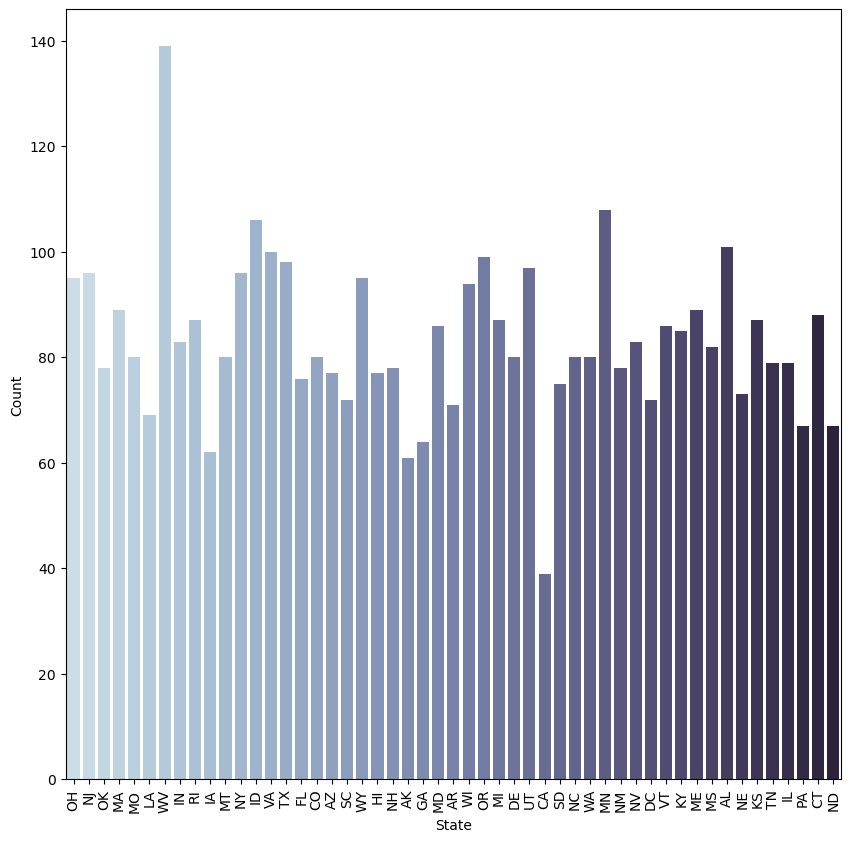

In [16]:
plt.figure(figsize=(10, 10))
sns.countplot(x='state', data=train, palette="ch:s=.25,rot=-.25")
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

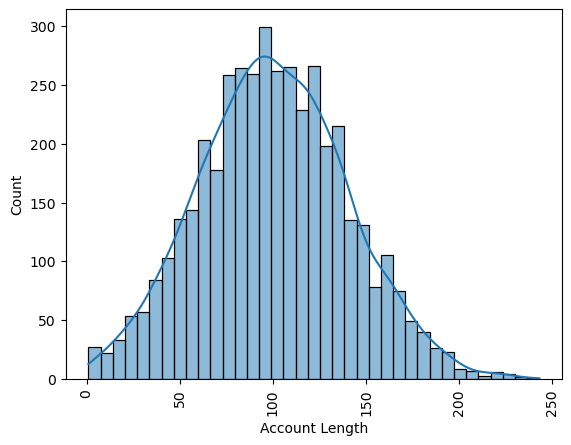

In [17]:
# plt.figure(figsize=(10, 10))
sns.histplot(x='account_length', data=train, kde = True)
plt.xticks(rotation=90)
plt.xlabel('Account Length')
plt.ylabel('Count')
plt.show()

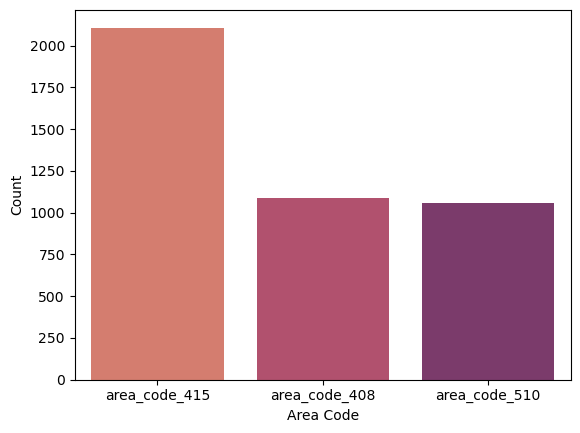

In [18]:
# plt.figure(figsize=(10, 10))
sns.countplot(x='area_code', data=train, palette="flare")
#plt.xticks(rotation=90)
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.show()

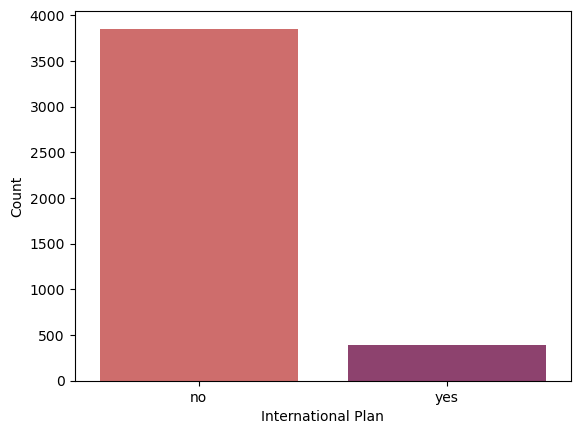

In [19]:
sns.countplot(x='international_plan', data=train, palette="flare")
#plt.xticks(rotation=90)
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()

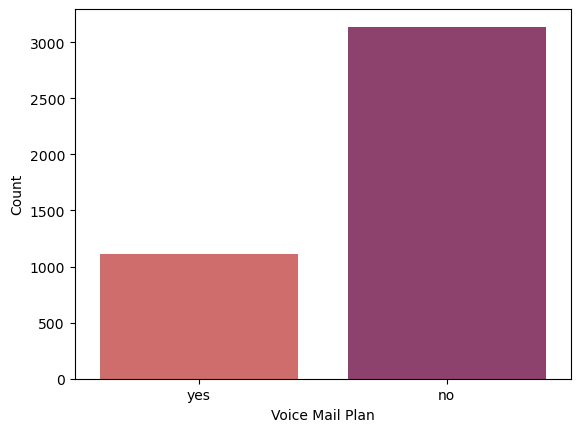

In [20]:
sns.countplot(x='voice_mail_plan', data=train, palette="flare")
#plt.xticks(rotation=90)
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.show()

In [21]:
train_n = train
numeric_columns = train.select_dtypes(include=['number'])
train_n[numeric_columns.columns] = numeric_columns
train_n = train_n[numeric_columns.columns]
train_n.head()

account_length  number_vmail_messages  total_day_minutes  total_day_calls  \
0             107                     26              161.6              123   
1             137                      0              243.4              114   
2              84                      0              299.4               71   
3              75                      0              166.7              113   
4             121                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls  
0                              1  
1                              0  
2                              2  
3                              3  
4                              3

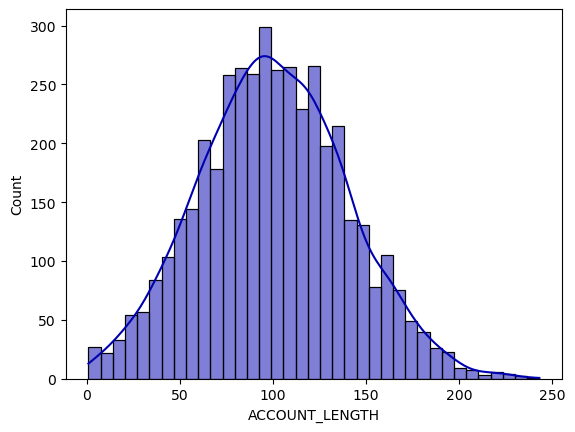

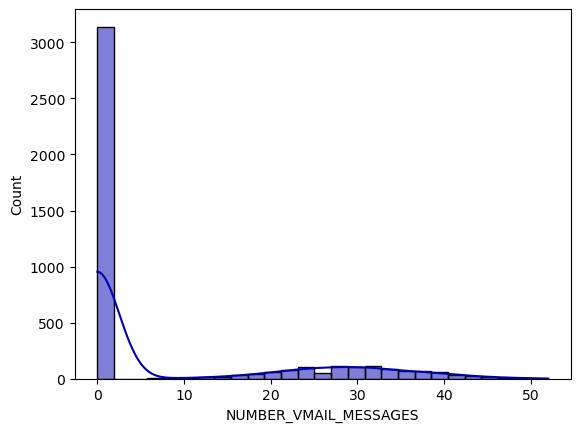

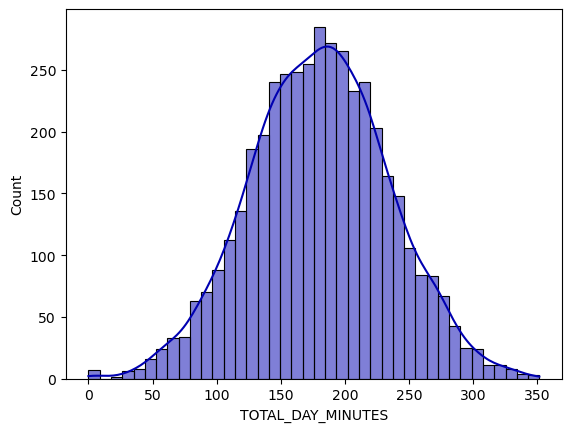

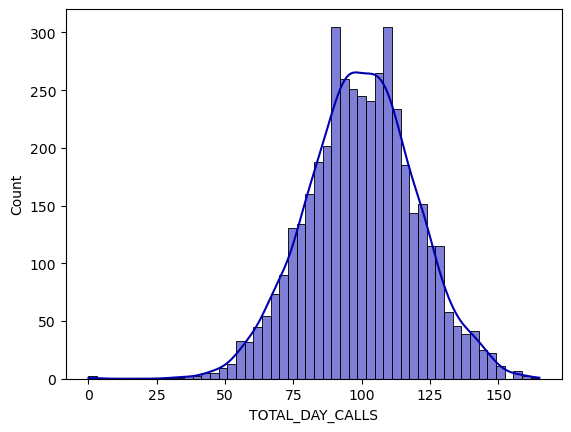

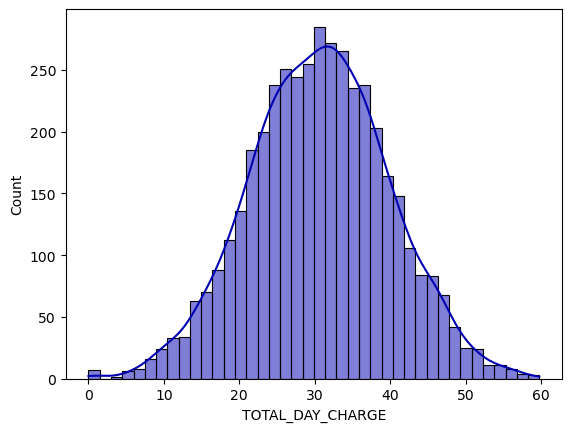

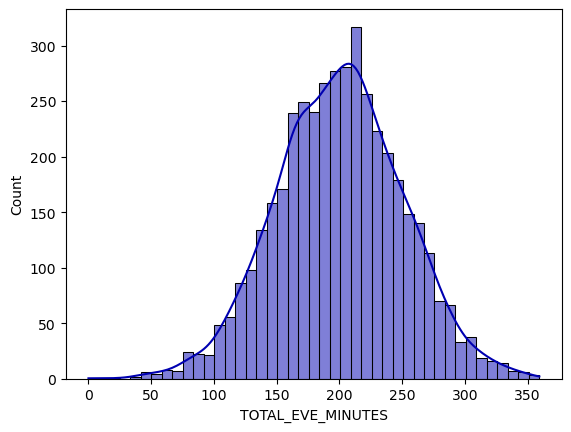

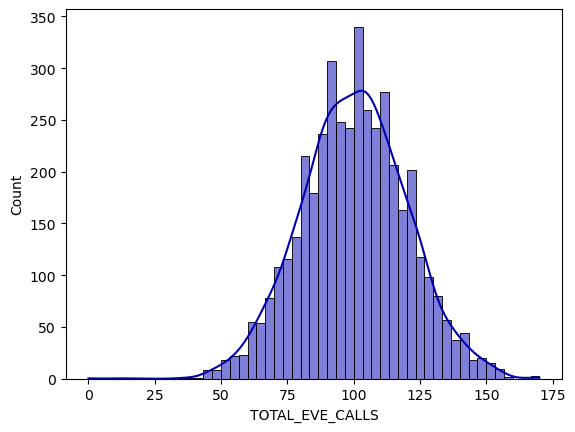

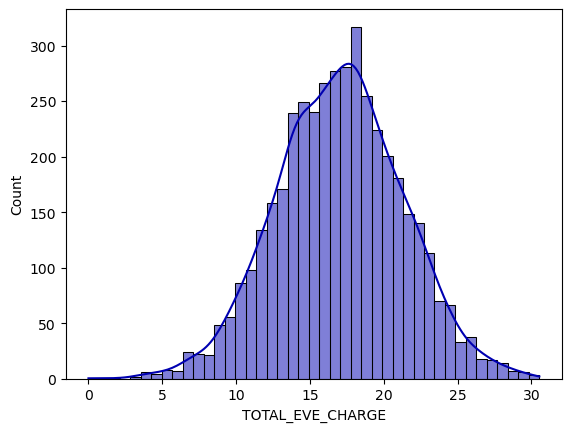

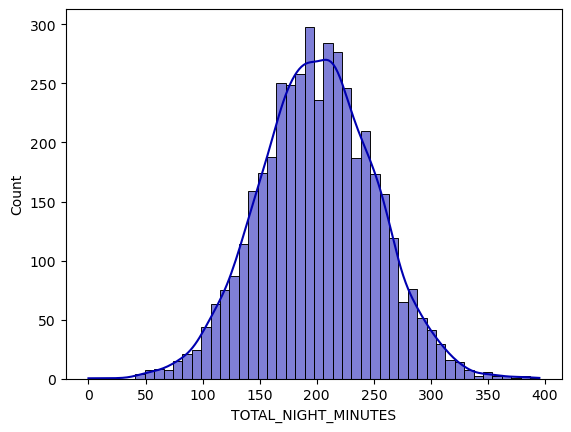

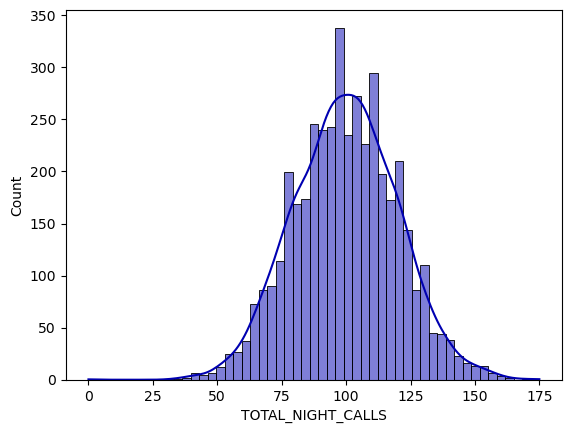

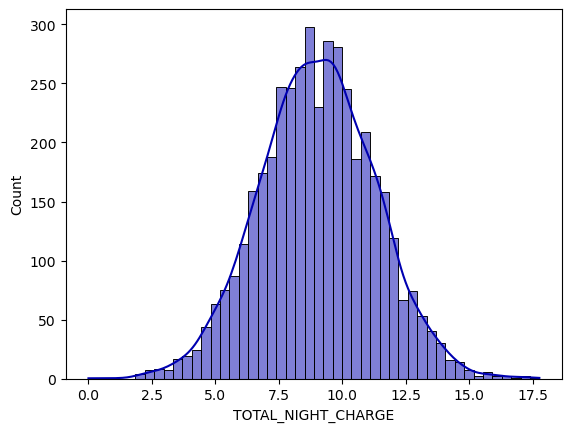

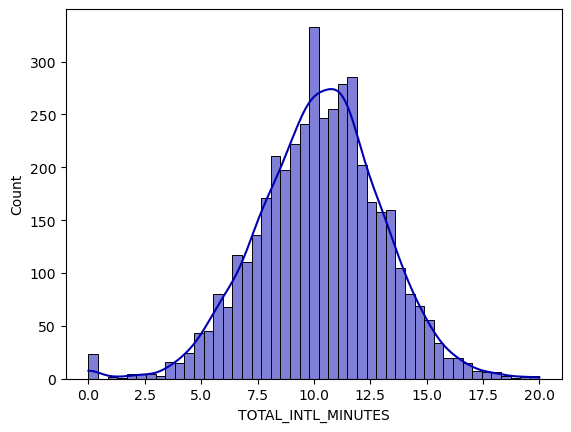

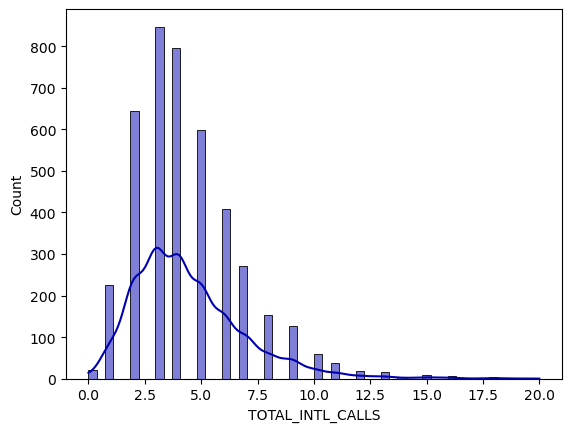

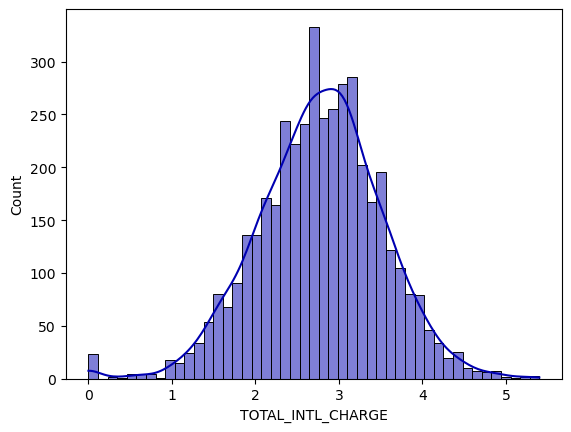

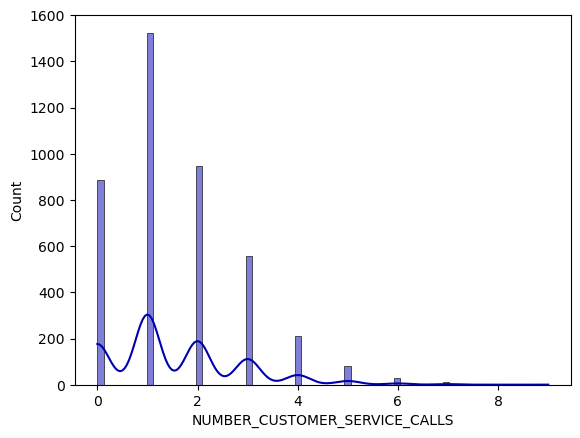

In [22]:
sns.set_palette('seismic')
for col in train_n:
    plt.figure()
    sns.histplot(train_n[col],kde=True)
    plt.xlabel(col.upper())
    plt.ylabel('Count')
    plt.show()

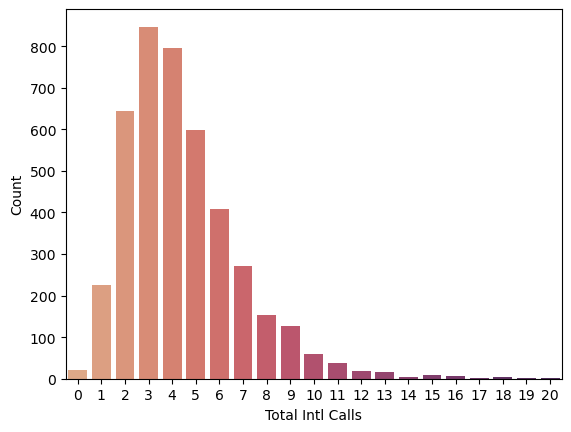

In [23]:
sns.countplot(x='total_intl_calls', data=train, palette="flare")
#plt.xticks(rotation=90)
plt.xlabel('Total Intl Calls')
plt.ylabel('Count')
plt.show()

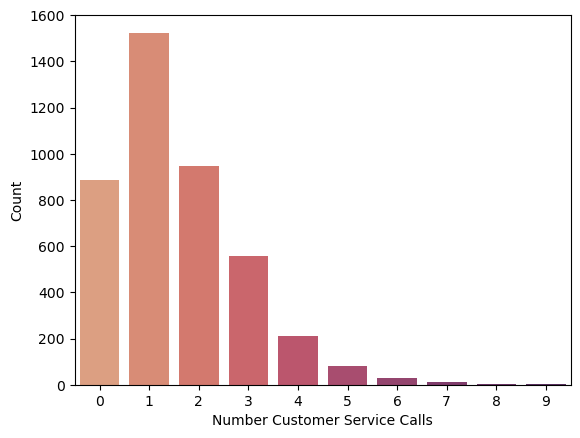

In [24]:
sns.countplot(x='number_customer_service_calls', data=train, palette="flare")
#plt.xticks(rotation=90)
plt.xlabel('Number Customer Service Calls')
plt.ylabel('Count')
plt.show()

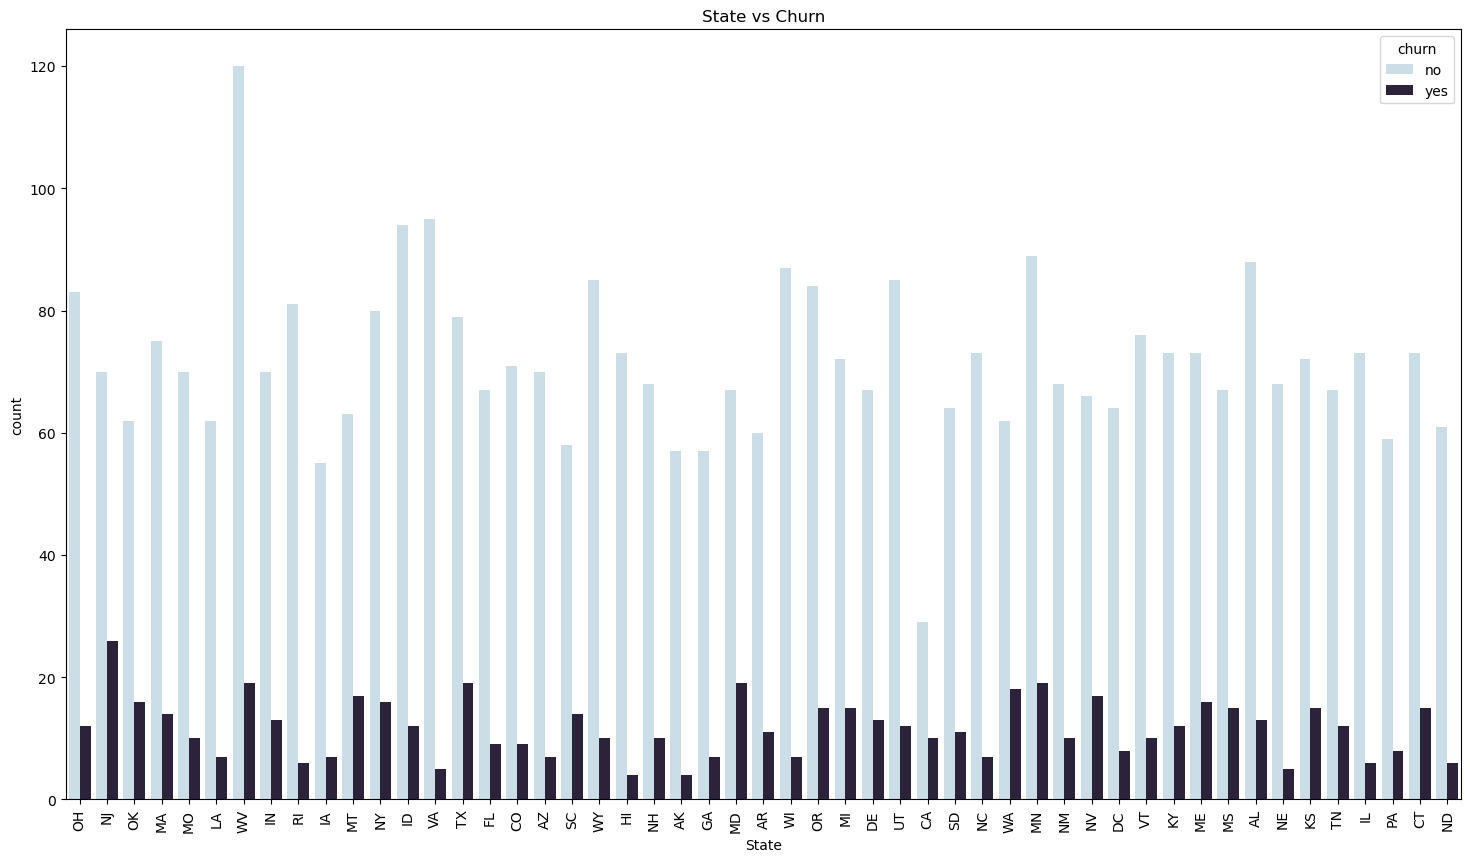

In [25]:
plt.figure(figsize=(18, 10))
sns.countplot(x='state', hue='churn', data=train, palette="ch:s=.25,rot=-.25")
plt.xticks(rotation=90)
plt.xlabel('State')
plt.title('State vs Churn')
plt.show()

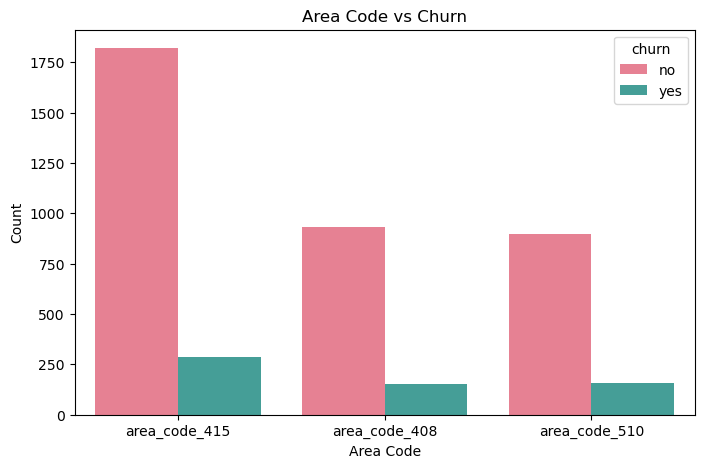

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x='area_code', hue='churn', data=train, palette = 'husl')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.title('Area Code vs Churn')
plt.show()

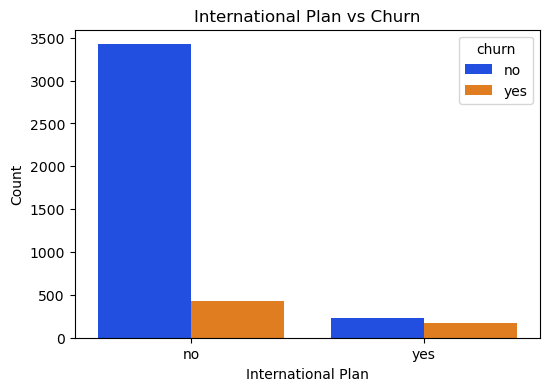

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(x='international_plan', hue='churn', data=train, palette = 'bright')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.title('International Plan vs Churn')
plt.show()

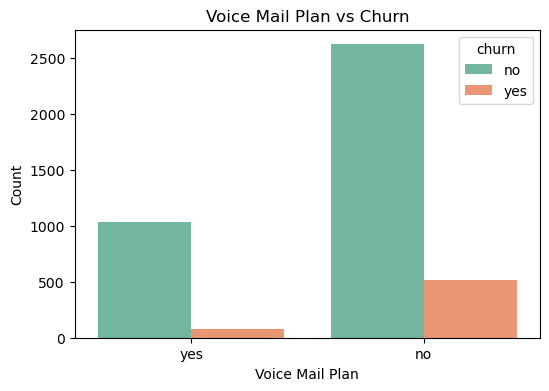

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='voice_mail_plan', hue='churn', data=train, palette = 'Set2')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.title('Voice Mail Plan vs Churn')
plt.show()

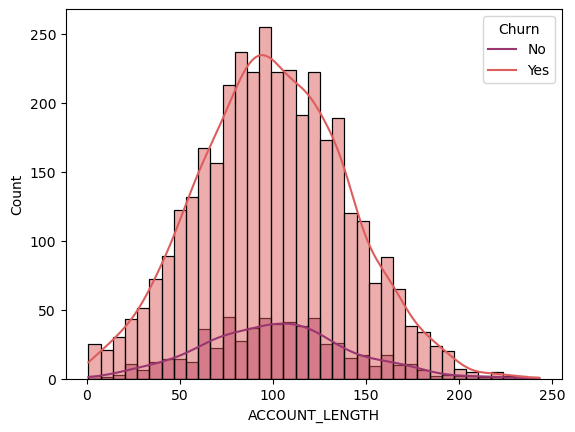

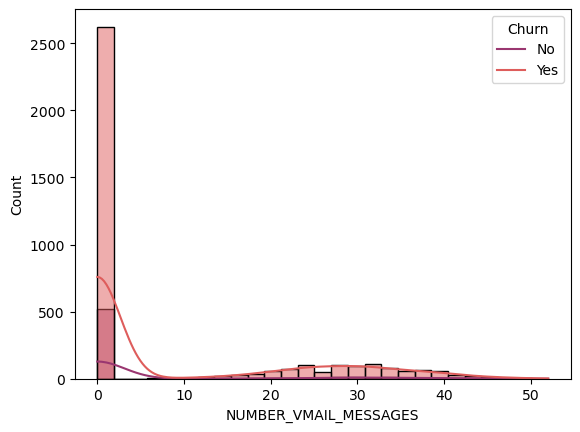

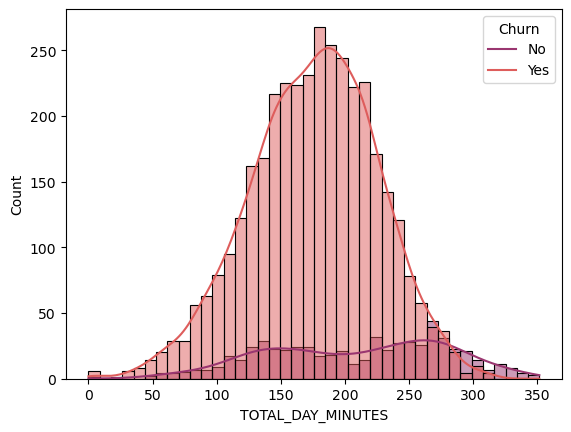

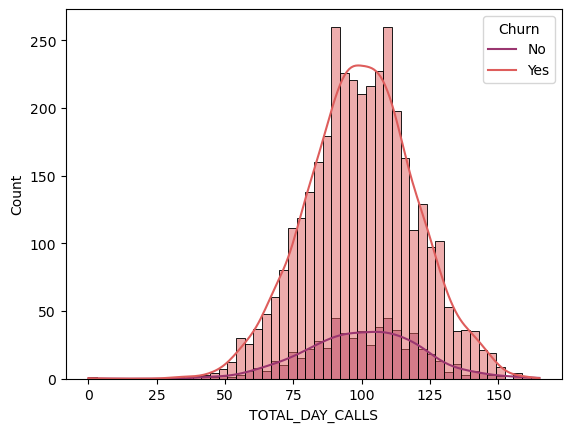

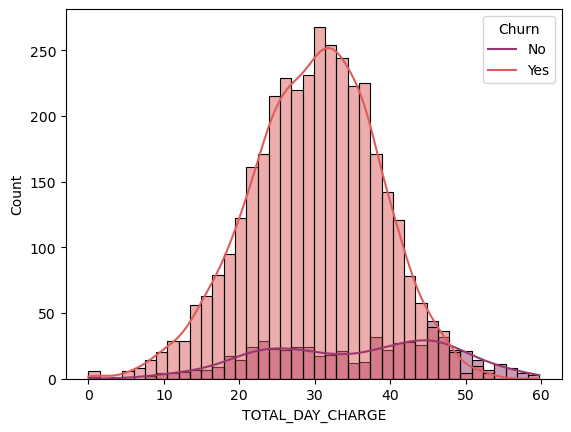

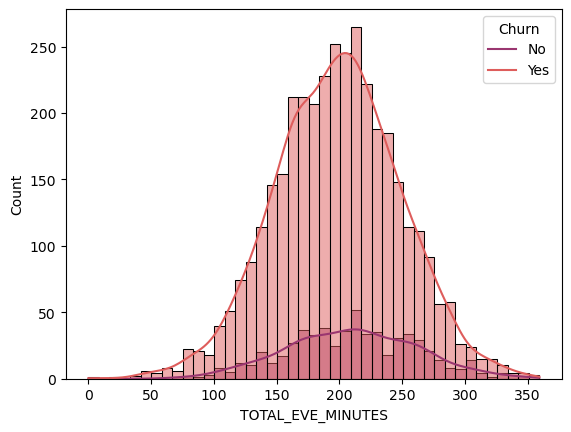

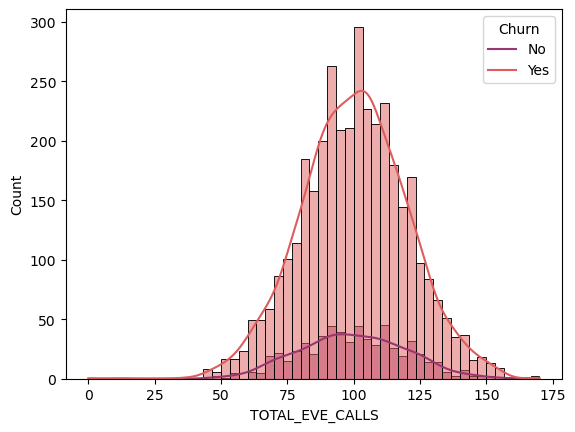

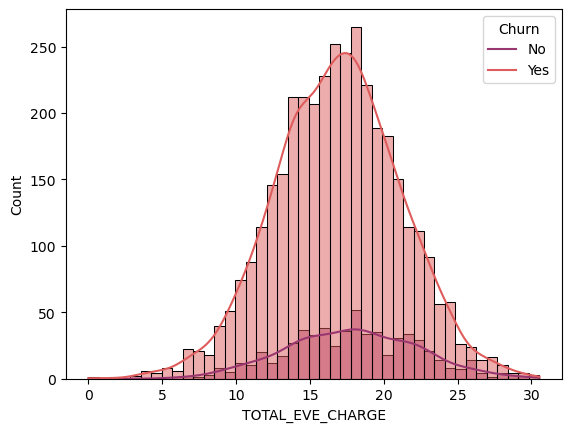

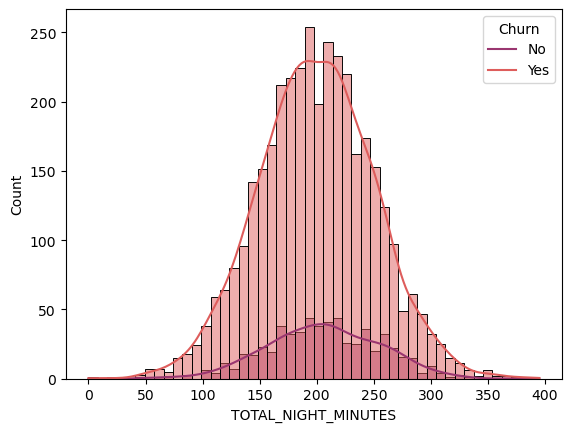

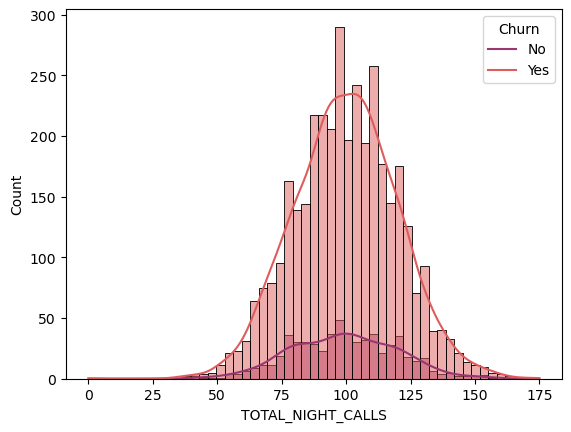

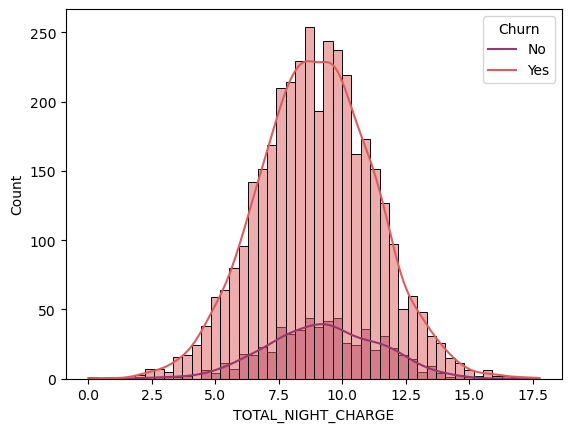

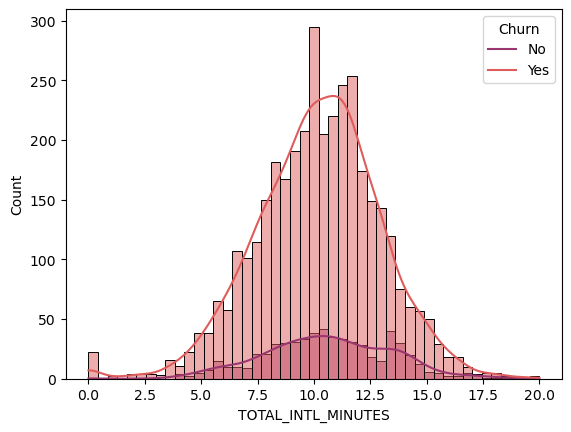

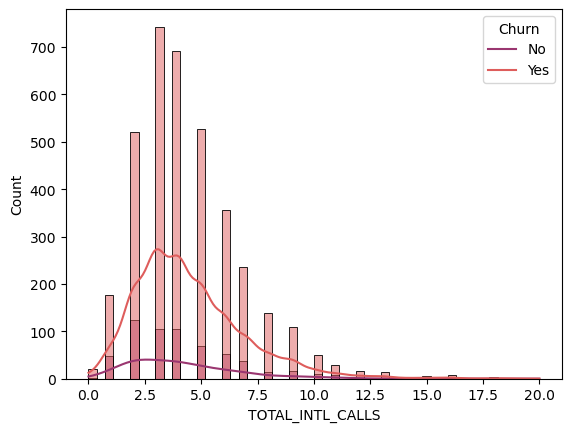

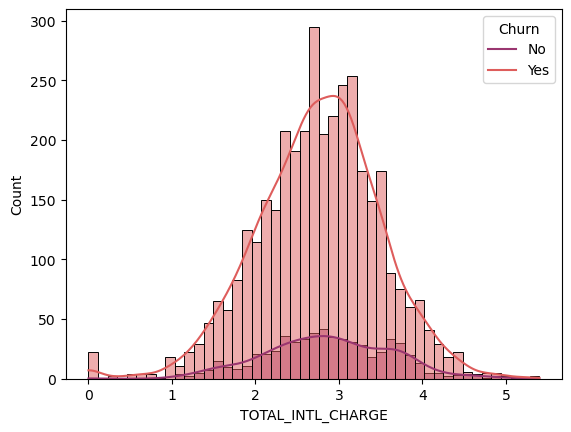

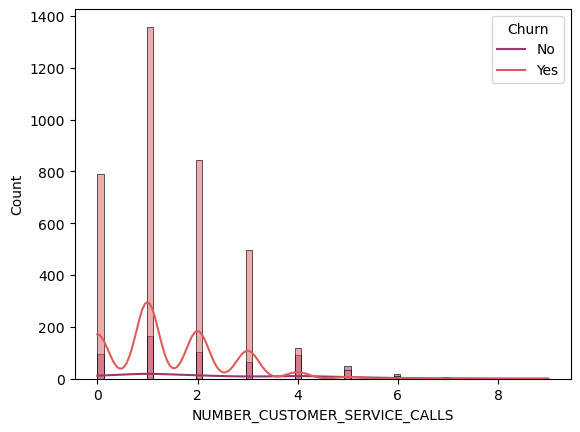

In [29]:
for col in train_n.columns:
    if col != 'churn' :  # Skip the 'churn' column itself
        plt.figure()
        sns.histplot(data=train_n, x=col, kde=True, hue=train['churn'], palette = 'flare',common_norm=False)
        plt.xlabel(col.upper())
        plt.ylabel('Count')
        plt.legend(title='Churn', labels=['No', 'Yes'])  
        plt.show()

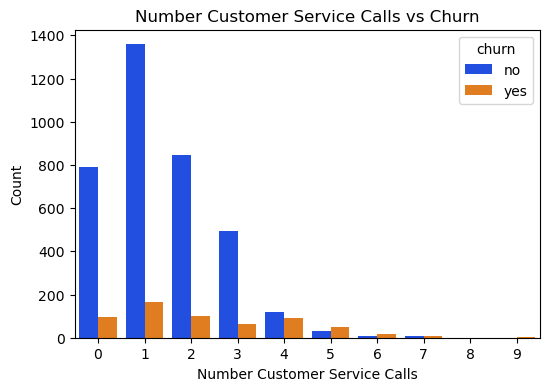

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(x='number_customer_service_calls', hue='churn', data=train, palette = 'bright')
plt.xlabel('Number Customer Service Calls')
plt.ylabel('Count')
plt.title('Number Customer Service Calls vs Churn')
plt.show()

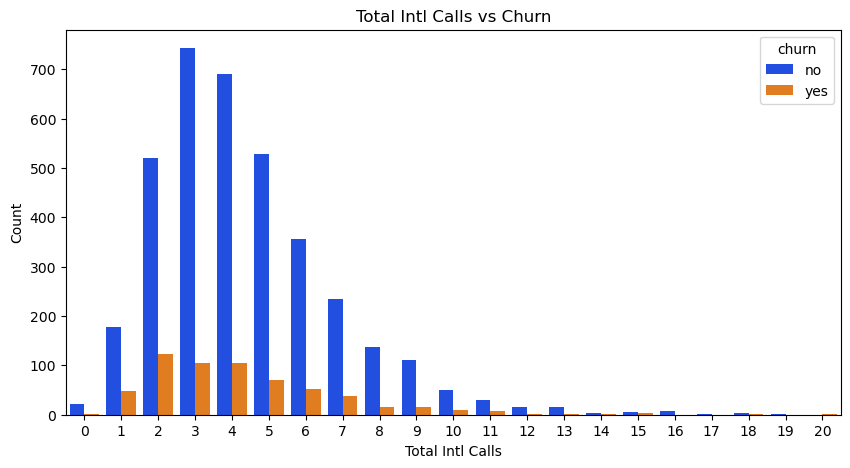

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(x='total_intl_calls', hue='churn', data=train, palette = 'bright')
plt.xlabel('Total Intl Calls')
plt.ylabel('Count')
plt.title('Total Intl Calls vs Churn')
plt.show()

In [16]:
train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [38]:
train1 = train.copy()
test1 = test.copy()
print(train1.head())
test1.head()

  state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62  

id state  account_length      area_code international_plan voice_mail_plan  \
0   1    KS             128  area_code_415                 no             yes   
1   2    AL             118  area_code_510                yes              no   
2   3    IA              62  area_code_415                 no              no   
3   4    VT              93  area_code_510                 no              no   
4   5    NE             174  area_code_415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                      0              223.4               98   
2                      0              120.7               70   
3                      0              190.7              114   
4                      0              124.3               76   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             37.98              220.6              101             18.75   
2             20.52              307.2               76             26.11   
3             32.42              218.2              111             18.55   
4             21.13              277.1              112             23.55   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                203.9                118                9.18   
2                203.0                 99                9.14   
3                129.6                121                5.83   
4                250.7                115               11.28   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                 6.3                 6               1.70   
2                13.1                 6               3.54   
3                 8.1                 3               2.19   
4                15.5                 5               4.19   

   number_customer_service_calls  
0                              1  
1                              0  
2                              4  
3                              3  
4                              3

For Model Building first convert Categorical Variables into Numerical Labels.
As we want categorical column to convert it into numerical labels for both train and test data, we can create each instance for each column.
Before that lets check whether the values of categorical variables of train and test data are same or not.

In [39]:
# Extract the two categorical columns from each dataframe
column1 = train1['state']
column2 = test1['state']

# Get the unique values in each column
unique_values1 = set(column1.unique())
unique_values2 = set(column2.unique())

# Check if the unique values are different
if unique_values1 != unique_values2:
    print("The unique values in the two columns are different.")
else:
    print("The unique values in the two columns are the same.")

The unique values in the two columns are the same.


In [40]:
# Get unique values from both columns
unique_values = set(column1.unique()).union(set(column2.unique()))

# Create a mapping dictionary from unique values to numeric values
mapping = {value: i for i, value in enumerate(unique_values)}

# Map the categorical columns to numeric values in both datasets
train1['state'] = column1.map(mapping)
test1['state'] = column2.map(mapping)


In [41]:
train1.head()

state  account_length      area_code international_plan voice_mail_plan  \
0      8             107  area_code_415                 no             yes   
1     43             137  area_code_415                 no              no   
2      8              84  area_code_408                yes              no   
3      9              75  area_code_415                yes              no   
4      4             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [42]:
test1.head()

id  state  account_length      area_code international_plan  \
0   1     47             128  area_code_415                 no   
1   2      7             118  area_code_510                yes   
2   3     25              62  area_code_415                 no   
3   4     42              93  area_code_510                 no   
4   5     46             174  area_code_415                 no   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0             yes                     25              265.1              110   
1              no                      0              223.4               98   
2              no                      0              120.7               70   
3              no                      0              190.7              114   
4              no                      0              124.3               76   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             37.98              220.6              101             18.75   
2             20.52              307.2               76             26.11   
3             32.42              218.2              111             18.55   
4             21.13              277.1              112             23.55   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                203.9                118                9.18   
2                203.0                 99                9.14   
3                129.6                121                5.83   
4                250.7                115               11.28   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                 6.3                 6               1.70   
2                13.1                 6               3.54   
3                 8.1                 3               2.19   
4                15.5                 5               4.19   

   number_customer_service_calls  
0                              1  
1                              0  
2                              4  
3                              3  
4                              3

In [43]:
train1.area_code.unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [44]:
d1 = {'area_code_415' : 0, 'area_code_408' : 1, 'area_code_510' : 2}
train1['area_code'] = train1['area_code'].map(d1)
test1['area_code'] = test1['area_code'].map(d1)
print(train1.head())
test1.head()

   state  account_length  area_code international_plan voice_mail_plan  \
0      8             107          0                 no             yes   
1     43             137          0                 no              no   
2      8              84          1                yes              no   
3      9              75          0                yes              no   
4      4             121          2                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41

id  state  account_length  area_code international_plan voice_mail_plan  \
0   1     47             128          0                 no             yes   
1   2      7             118          2                yes              no   
2   3     25              62          0                 no              no   
3   4     42              93          2                 no              no   
4   5     46             174          0                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                      0              223.4               98   
2                      0              120.7               70   
3                      0              190.7              114   
4                      0              124.3               76   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             37.98              220.6              101             18.75   
2             20.52              307.2               76             26.11   
3             32.42              218.2              111             18.55   
4             21.13              277.1              112             23.55   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                203.9                118                9.18   
2                203.0                 99                9.14   
3                129.6                121                5.83   
4                250.7                115               11.28   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                 6.3                 6               1.70   
2                13.1                 6               3.54   
3                 8.1                 3               2.19   
4                15.5                 5               4.19   

   number_customer_service_calls  
0                              1  
1                              0  
2                              4  
3                              3  
4                              3

In [45]:
d1 = {'no' : 0, 'yes' : 1}
train1['international_plan'] = train1['international_plan'].map(d1)
test1['international_plan'] = test1['international_plan'].map(d1)
print(train1.head())
test1.head()

   state  account_length  area_code  international_plan voice_mail_plan  \
0      8             107          0                   0             yes   
1     43             137          0                   0              no   
2      8              84          1                   1              no   
3      9              75          0                   1              no   
4      4             121          2                   0             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1         

id  state  account_length  area_code  international_plan voice_mail_plan  \
0   1     47             128          0                   0             yes   
1   2      7             118          2                   1              no   
2   3     25              62          0                   0              no   
3   4     42              93          2                   0              no   
4   5     46             174          0                   0              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                      0              223.4               98   
2                      0              120.7               70   
3                      0              190.7              114   
4                      0              124.3               76   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             37.98              220.6              101             18.75   
2             20.52              307.2               76             26.11   
3             32.42              218.2              111             18.55   
4             21.13              277.1              112             23.55   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                203.9                118                9.18   
2                203.0                 99                9.14   
3                129.6                121                5.83   
4                250.7                115               11.28   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                 6.3                 6               1.70   
2                13.1                 6               3.54   
3                 8.1                 3               2.19   
4                15.5                 5               4.19   

   number_customer_service_calls  
0                              1  
1                              0  
2                              4  
3                              3  
4                              3

In [46]:
d1 = {'no' : 0, 'yes' : 1}
train1['voice_mail_plan'] = train1['voice_mail_plan'].map(d1)
test1['voice_mail_plan'] = test1['voice_mail_plan'].map(d1)
print(train1.head())
test1.head()

   state  account_length  area_code  international_plan  voice_mail_plan  \
0      8             107          0                   0                1   
1     43             137          0                   0                0   
2      8              84          1                   1                0   
3      9              75          0                   1                0   
4      4             121          2                   0                1   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1   

id  state  account_length  area_code  international_plan  voice_mail_plan  \
0   1     47             128          0                   0                1   
1   2      7             118          2                   1                0   
2   3     25              62          0                   0                0   
3   4     42              93          2                   0                0   
4   5     46             174          0                   0                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                      0              223.4               98   
2                      0              120.7               70   
3                      0              190.7              114   
4                      0              124.3               76   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             37.98              220.6              101             18.75   
2             20.52              307.2               76             26.11   
3             32.42              218.2              111             18.55   
4             21.13              277.1              112             23.55   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                203.9                118                9.18   
2                203.0                 99                9.14   
3                129.6                121                5.83   
4                250.7                115               11.28   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                 6.3                 6               1.70   
2                13.1                 6               3.54   
3                 8.1                 3               2.19   
4                15.5                 5               4.19   

   number_customer_service_calls  
0                              1  
1                              0  
2                              4  
3                              3  
4                              3

In [47]:
d1 = {'no' : 0, 'yes' : 1}
train1['churn'] = train1['churn'].map(d1)
train1.head()

state  account_length  area_code  international_plan  voice_mail_plan  \
0      8             107          0                   0                1   
1     43             137          0                   0                0   
2      8              84          1                   1                0   
3      9              75          0                   1                0   
4      4             121          2                   0                1   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls  churn  
0                              1      0  
1                              0      0  
2                              2      0  
3                              3      0  
4                              3      0

In [48]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   int64  
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   int64  
 3   international_plan             4250 non-null   int64  
 4   voice_mail_plan                4250 non-null   int64  
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [49]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    int64  
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    int64  
 4   international_plan             750 non-null    int64  
 5   voice_mail_plan                750 non-null    int64  
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

<Axes: >

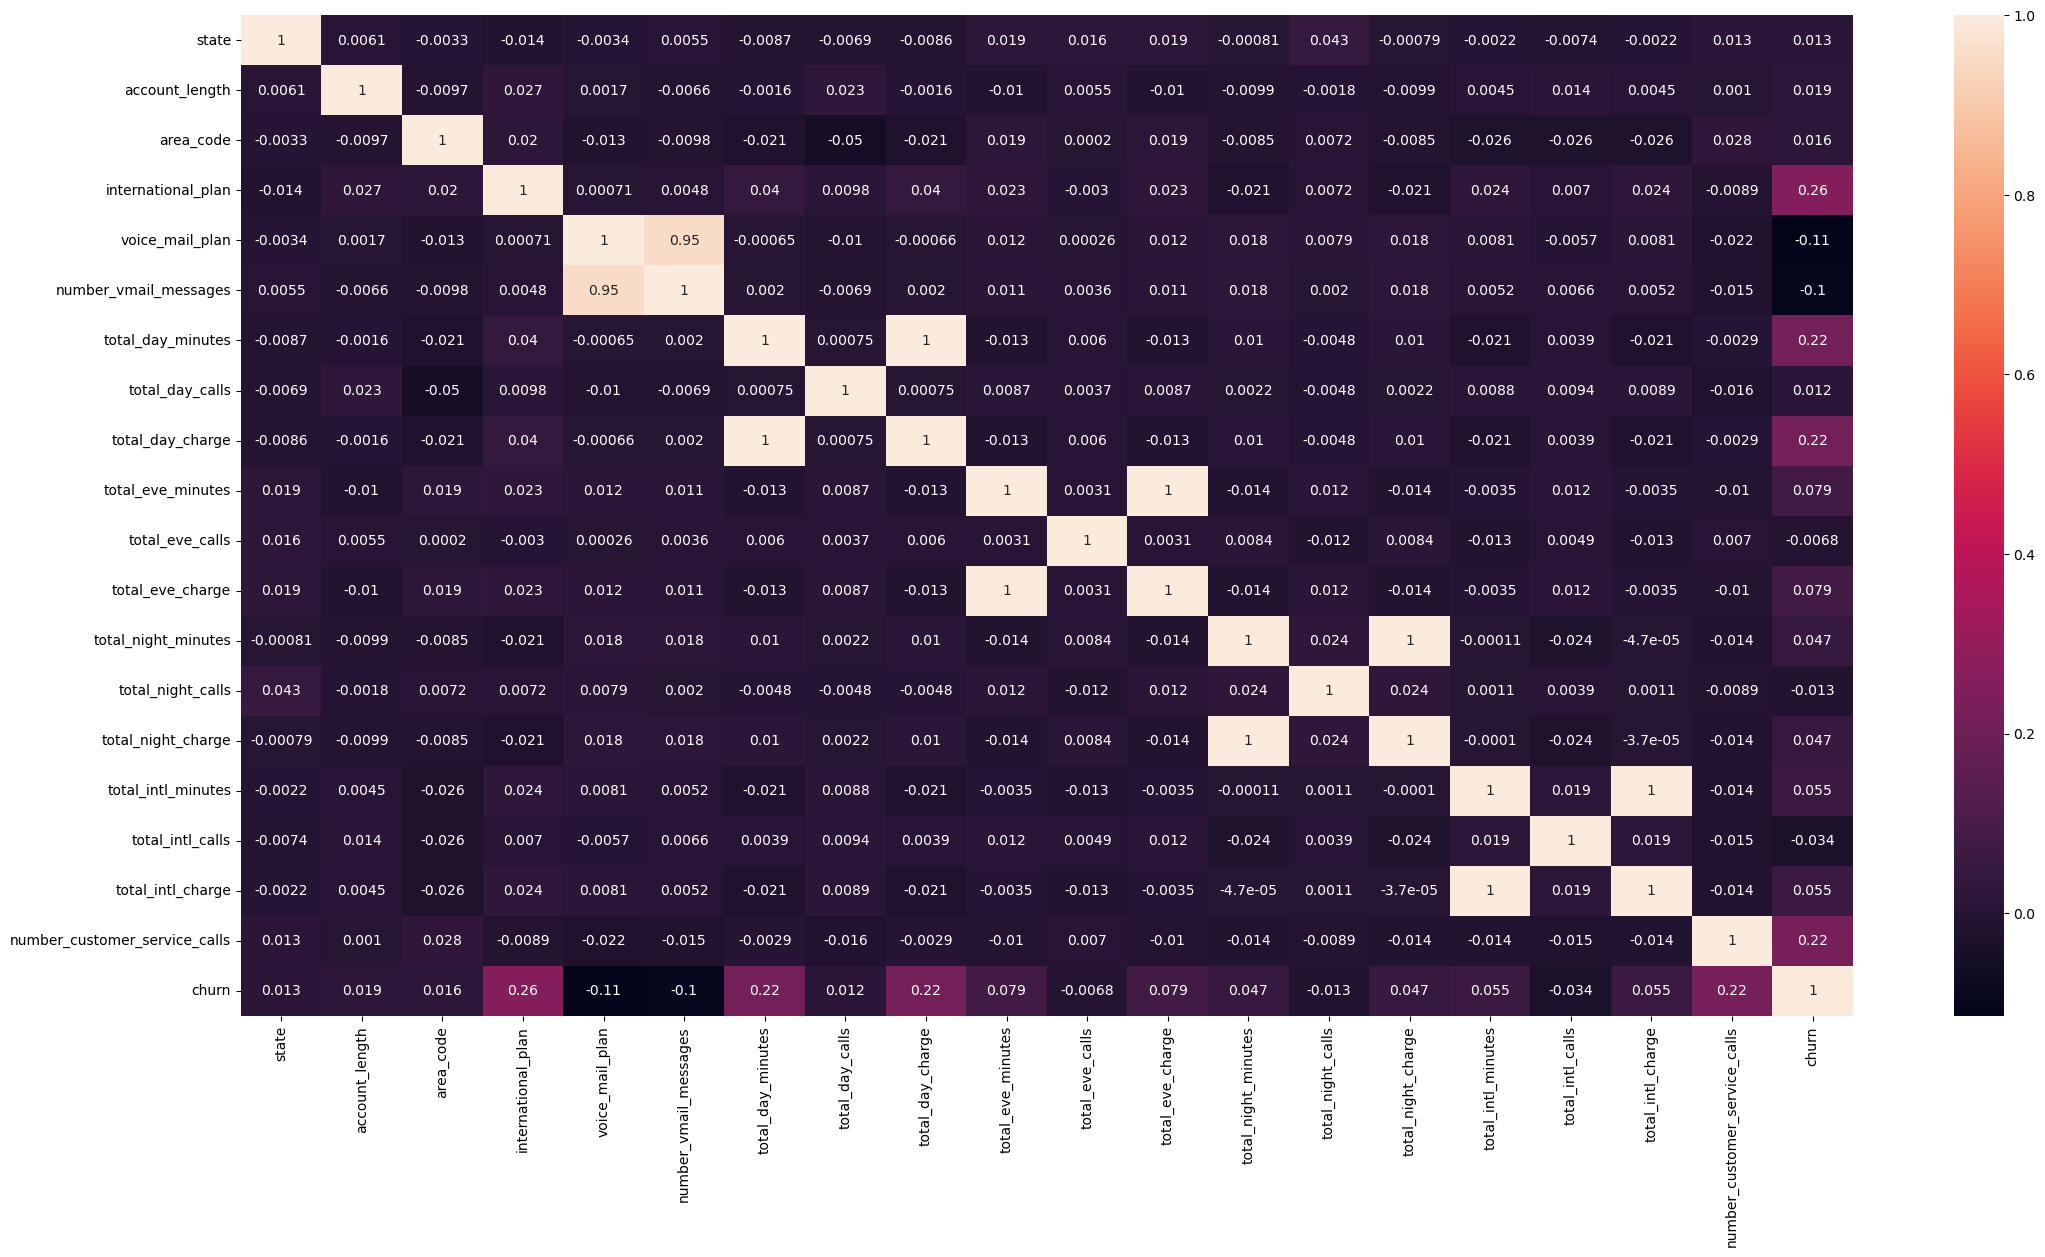

In [51]:
##Correlation Plot
import seaborn as sns
plt.figure(figsize=(26,13))
sns.heatmap(train1.corr(), annot=True)

In [53]:
train2 = train1
train2.head()

state  account_length  area_code  international_plan  voice_mail_plan  \
0      8             107          0                   0                1   
1     43             137          0                   0                0   
2      8              84          1                   1                0   
3      9              75          0                   1                0   
4      4             121          2                   0                1   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls  churn  
0                              1      0  
1                              0      0  
2                              2      0  
3                              3      0  
4                              3      0

## Feature Selection using Correlation

In [52]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with any other feature

def correlation_var(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we comparing correlation value between the independent variable with the set threshold value
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [54]:
# taking count of highly correlated feature 
# It is said that we should set threshold value at 0.75 so that we can remove highly correlated features
# while observing heatmap we observed that we dont have high correlation between independent features
corr_features = correlation_var(train2, 0.7)
len(set(corr_features))

5

In [55]:
corr_features

{'number_vmail_messages',
 'total_day_charge',
 'total_eve_charge',
 'total_intl_charge',
 'total_night_charge'}

In [56]:
train_corr = train2.drop(corr_features,axis=1)
train_corr.head()

state  account_length  area_code  international_plan  voice_mail_plan  \
0      8             107          0                   0                1   
1     43             137          0                   0                0   
2      8              84          1                   1                0   
3      9              75          0                   1                0   
4      4             121          2                   0                1   

   total_day_minutes  total_day_calls  total_eve_minutes  total_eve_calls  \
0              161.6              123              195.5              103   
1              243.4              114              121.2              110   
2              299.4               71               61.9               88   
3              166.7              113              148.3              122   
4              218.2               88              348.5              108   

   total_night_minutes  total_night_calls  total_intl_minutes  \
0                254.4                103                13.7   
1                162.6                104                12.2   
2                196.9                 89                 6.6   
3                186.9                121                10.1   
4                212.6                118                 7.5   

   total_intl_calls  number_customer_service_calls  churn  
0                 3                              1      0  
1                 5                              0      0  
2                 7                              2      0  
3                 3                              3      0  
4                 7                              3      0

In [58]:
train_corr.shape

(4250, 15)

## Model Building

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_corr.drop('churn',axis=1),train_corr['churn'], test_size=0.20,random_state=100)

In [61]:
print('Shape X_train data {}'.format(X_train.shape))
X_train.head()

Shape X_train data (3400, 14)


state  account_length  area_code  international_plan  voice_mail_plan  \
712      18             166          1                   0                0   
1766      7              82          1                   0                0   
3306     45             142          2                   0                0   
2566     40              88          0                   0                0   
2323     38             145          1                   0                1   

      total_day_minutes  total_day_calls  total_eve_minutes  total_eve_calls  \
712               274.3              110               52.9              109   
1766              154.0              107               94.4              114   
3306              204.2               98              188.9               85   
2566               85.7              112              221.6               70   
2323              216.0               94              225.1              123   

      total_night_minutes  total_night_calls  total_intl_minutes  \
712                 246.1                119                10.9   
1766                287.6                 95                10.1   
3306                231.2                136                 6.5   
2566                190.6                 75                11.6   
2323                234.7                109                10.7   

      total_intl_calls  number_customer_service_calls  
712                  5                              0  
1766                 7                              1  
3306                 6                              1  
2566                 3                              4  
2323                 1                              2

## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from  sklearn import metrics

In [64]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\sagar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [66]:
## Get prediction on test data using trained model
## Store the prediction in y_pred object
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [67]:
print('Accuracy of the log Regn Classifier on Test data is: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of the log Regn Classifier on Test data is: 0.85


In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n", confusion_matrix)

Confusion Matrix 
 [[720  21]
 [103   6]]


In [71]:
y_test

249     1
2419    0
1568    1
1483    0
705     0
       ..
1399    0
3414    0
2685    1
650     0
3289    0
Name: churn, Length: 850, dtype: int64

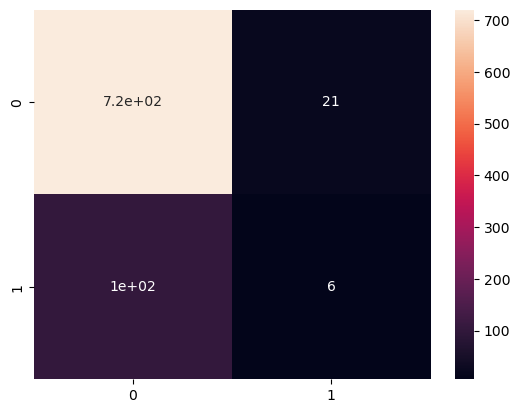

In [72]:
import seaborn as sn
sn.heatmap(confusion_matrix, annot = True)
import matplotlib.pyplot as plt
plt.show()

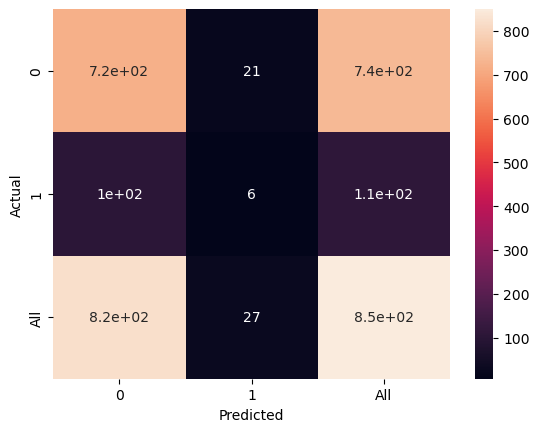

In [73]:
confusion_matrix_new = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix_new, annot = True)
plt.show()

In [75]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy :",Accuracy)

Overall_Error_Rate = 1-Accuracy
print("Overall_Error_Rate :",Overall_Error_Rate)

Precision = metrics.precision_score(y_test, y_pred)
print("Precision :",Precision)

Sensitivity_recall = metrics.recall_score(y_test, y_pred)
print("Sensitivity Recall :",Sensitivity_recall)

Specificity = metrics.recall_score(y_test, y_pred, pos_label = 0)
print("Specificity :",Specificity)

F1_score = metrics.f1_score(y_test, y_pred)
print("F1 Score :",F1_score)

Accuracy : 0.8541176470588235
Overall_Error_Rate : 0.14588235294117646
Precision : 0.2222222222222222
Sensitivity Recall : 0.05504587155963303
Specificity : 0.97165991902834
F1 Score : 0.08823529411764706


In [76]:
FPR = 1 - Specificity
FNR = 1 - Sensitivity_recall
print({"False Positive Rate":FPR,"False Negative Rate":FNR})

{'False Positive Rate': 0.028340080971659964, 'False Negative Rate': 0.944954128440367}


In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [79]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
# Defining method used for Roc and Auc
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# Print probability data frame from column 2 which has Index = 1

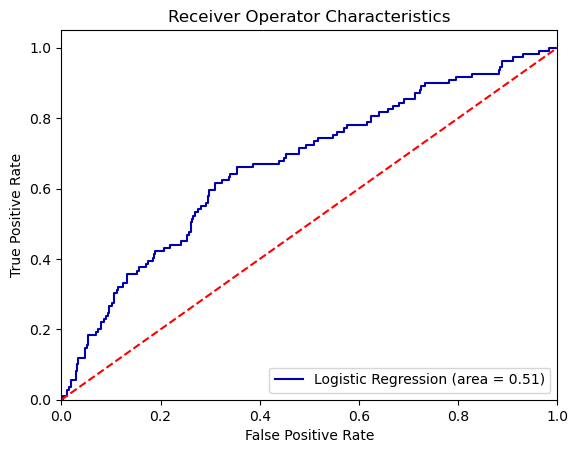

In [80]:
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristics")
plt.legend(loc = "lower right")
# plt.savefig('Plot_Roc') # To save the plot in some object
plt.show()

## Decision Tree

In [81]:
from sklearn import tree
DTCL=tree.DecisionTreeClassifier() 
DTCL.fit(X_train,y_train)

DecisionTreeClassifier()

In [82]:
y_pred1=DTCL.predict(X_test)

In [85]:
import numpy as np
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)

from sklearn.metrics import accuracy_score

print('Confusion Matrix is \n', confusion_matrix)

Confusion Matrix is 
 [[702  39]
 [ 31  78]]


In [86]:
Accuracy = metrics.accuracy_score(y_test, y_pred1)
print("Accuracy :",Accuracy)

Overall_Error_Rate = 1-Accuracy
print("Overall_Error_Rate :",Overall_Error_Rate)

Precision = metrics.precision_score(y_test, y_pred1)
print("Precision :",Precision)

Sensitivity_recall = metrics.recall_score(y_test, y_pred1)
print("Sensitivity Recall :",Sensitivity_recall)

Specificity = metrics.recall_score(y_test, y_pred1, pos_label = 0)
print("Specificity :",Specificity)

F1_score = metrics.f1_score(y_test, y_pred1)
print("F1 Score :",F1_score)

Accuracy : 0.9176470588235294
Overall_Error_Rate : 0.08235294117647063
Precision : 0.6666666666666666
Sensitivity Recall : 0.7155963302752294
Specificity : 0.9473684210526315
F1 Score : 0.6902654867256638


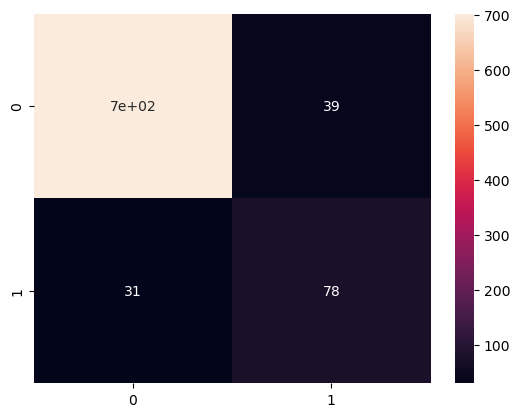

In [87]:
import seaborn as sn
sn.heatmap(confusion_matrix, annot = True)
import matplotlib.pyplot as plt
plt.show()

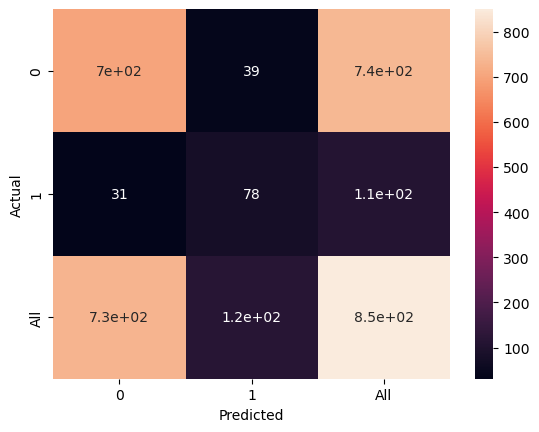

In [88]:
confusion_matrix_new = pd.crosstab(y_test, y_pred1, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix_new, annot = True)
plt.show()

In [90]:
dtcl_roc_auc = roc_auc_score(y_test, DTCL.predict(X_test))
# Defining method used for Roc and Auc
fpr, tpr, thresholds = roc_curve(y_test, DTCL.predict_proba(X_test)[:,1])
# Print probability data frame from column 2 which has Index = 1

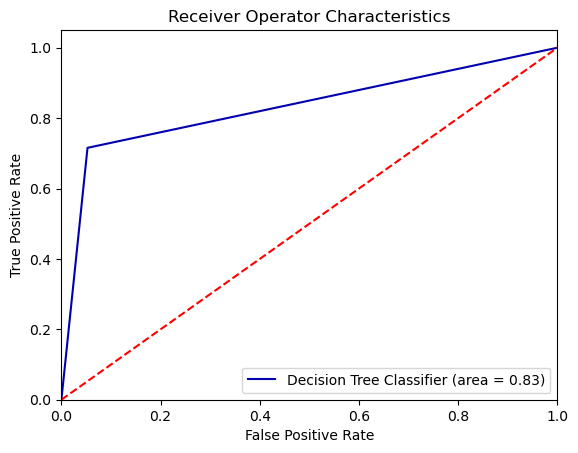

In [91]:
plt.figure()
plt.plot(fpr, tpr, label = 'Decision Tree Classifier (area = %0.2f)' %dtcl_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristics")
plt.legend(loc = "lower right")
plt.savefig('Plot_Roc') # To save the plot in some object
plt.show()

## Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [94]:
y_pred_RFC=RFC.predict(X_test)

In [95]:
print('Accuracy of the Random Forest Classifier Classifier on Test data is: {:.2f}'.format(RFC.score(X_test, y_test)))

Accuracy of the Random Forest Classifier Classifier on Test data is: 0.96


In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_RFC)
print("Confusion Matrix \n",confusion_matrix)

Confusion Matrix 
 [[736   5]
 [ 33  76]]


In [97]:
y_test

249     1
2419    0
1568    1
1483    0
705     0
       ..
1399    0
3414    0
2685    1
650     0
3289    0
Name: churn, Length: 850, dtype: int64

In [98]:
y_pred_RFC

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

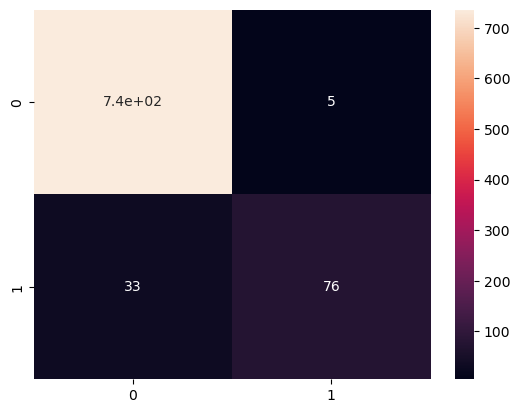

In [99]:
sns.heatmap(confusion_matrix, annot = True)
import matplotlib.pyplot as plt
plt.show()

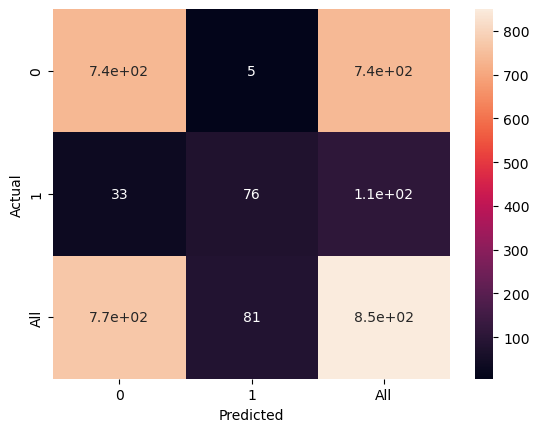

In [100]:
confusion_matrix_new = pd.crosstab(y_test, y_pred_RFC, rownames=['Actual'], colnames=['Predicted'], margins = True)
sns.heatmap(confusion_matrix_new, annot = True)
plt.show()

In [101]:
Accuracy = metrics.accuracy_score(y_test, y_pred_RFC)
print("Accuracy :",Accuracy)

Overall_Error_Rate = 1-Accuracy
print("Overall_Error_Rate :",Overall_Error_Rate)

Precision = metrics.precision_score(y_test, y_pred_RFC)
print("Precision :",Precision)

Sensitivity_recall = metrics.recall_score(y_test, y_pred_RFC)
print("Sensitivity Recall :",Sensitivity_recall)

Specificity = metrics.recall_score(y_test, y_pred_RFC, pos_label = 0)
print("Specificity :",Specificity)

F1_score = metrics.f1_score(y_test, y_pred_RFC)
print("F1 Score :",F1_score)

Accuracy : 0.9552941176470588
Overall_Error_Rate : 0.04470588235294115
Precision : 0.9382716049382716
Sensitivity Recall : 0.6972477064220184
Specificity : 0.9932523616734144
F1 Score : 0.8


In [102]:
FPR = 1 - Specificity
FNR = 1 - Sensitivity_recall
print({"False Positive Rate":FPR,"False Negative Rate":FNR})

{'False Positive Rate': 0.006747638326585648, 'False Negative Rate': 0.3027522935779816}


In [105]:
rfc_roc_auc = roc_auc_score(y_test, RFC.predict(X_test))
# Defining method used for Roc and Auc
fpr, tpr, thresholds = roc_curve(y_test, RFC.predict_proba(X_test)[:,1])
# Print probability data frame from column 2 which has Index = 1

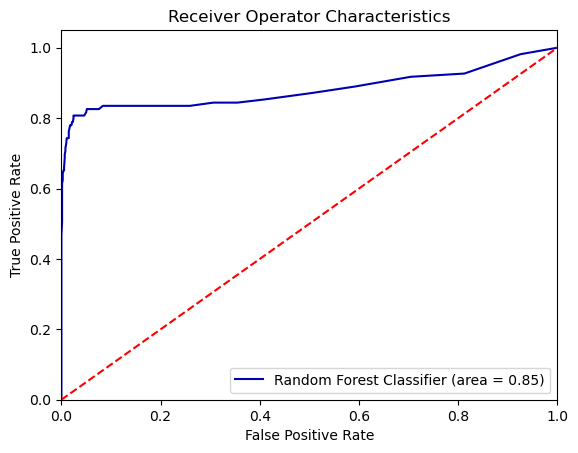

In [106]:
plt.figure()
plt.plot(fpr, tpr, label = 'Random Forest Classifier (area = %0.2f)' %rfc_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristics")
plt.legend(loc = "lower right")
# plt.savefig('Plot_Roc') # To save the plot in some object
plt.show()

## KNN Classifier

In [107]:
from sklearn import neighbors

In [108]:
Knn=neighbors.KNeighborsClassifier()
Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [110]:
y_pred2=Knn.predict(X_test)

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix \n", confusion_matrix)

Confusion Matrix 
 [[728  13]
 [ 78  31]]


In [112]:
y_test

249     1
2419    0
1568    1
1483    0
705     0
       ..
1399    0
3414    0
2685    1
650     0
3289    0
Name: churn, Length: 850, dtype: int64

In [113]:
y_pred2

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

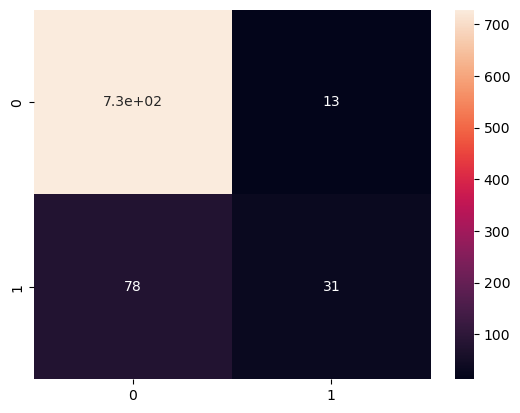

In [114]:
import seaborn as sn
sn.heatmap(confusion_matrix, annot = True)
import matplotlib.pyplot as plt
plt.show()

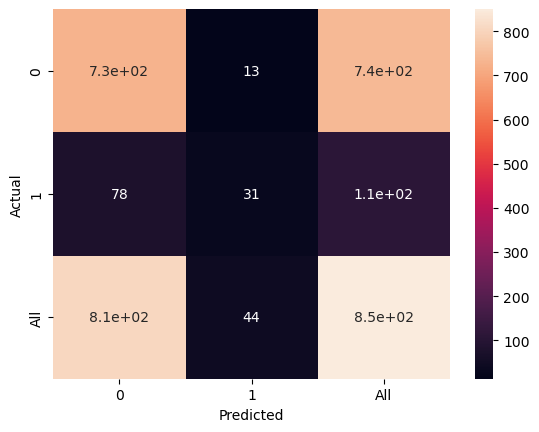

In [115]:
confusion_matrix_new = pd.crosstab(y_test, y_pred2, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix_new, annot = True)
plt.show()

In [116]:
Accuracy = metrics.accuracy_score(y_test, y_pred2)
print("Accuracy :",Accuracy)

Overall_Error_Rate = 1-Accuracy
print("Overall_Error_Rate :",Overall_Error_Rate)

Precision = metrics.precision_score(y_test, y_pred2)
print("Precision :",Precision)

Sensitivity_recall = metrics.recall_score(y_test, y_pred2)
print("Sensitivity Recall :",Sensitivity_recall)

Specificity = metrics.recall_score(y_test, y_pred2, pos_label = 0)
print("Specificity :",Specificity)

F1_score = metrics.f1_score(y_test, y_pred2)
print("F1 Score :",F1_score)

Accuracy : 0.8929411764705882
Overall_Error_Rate : 0.10705882352941176
Precision : 0.7045454545454546
Sensitivity Recall : 0.28440366972477066
Specificity : 0.9824561403508771
F1 Score : 0.40522875816993464


In [117]:
FPR = 1 - Specificity
FNR = 1 - Sensitivity_recall
print({"False Positive Rate":FPR,"False Negative Rate":FNR})

{'False Positive Rate': 0.01754385964912286, 'False Negative Rate': 0.7155963302752293}


In [119]:
knn_roc_auc = roc_auc_score(y_test, Knn.predict(X_test))
# Defining method used for Roc and Auc
fpr, tpr, thresholds = roc_curve(y_test, Knn.predict_proba(X_test)[:,1])
# Print probability data frame from column 2 which has Index = 1

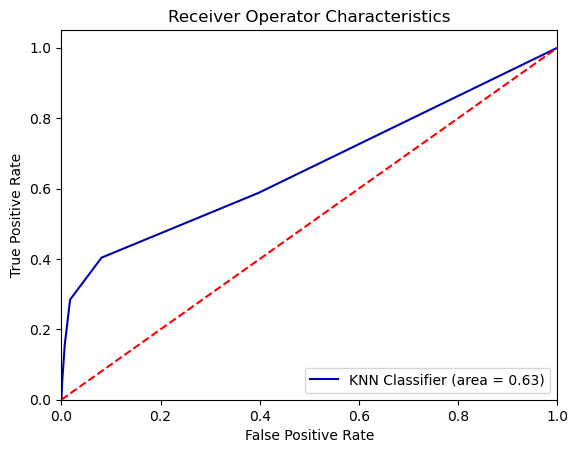

In [120]:
plt.figure()
plt.plot(fpr, tpr, label = 'KNN Classifier (area = %0.2f)' %knn_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristics")
plt.legend(loc = "lower right")
# plt.savefig('Plot_Roc') # To save the plot in some object
plt.show()

## Support Vector Classifier

In [121]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve

In [122]:
SVC = SVC()

In [123]:
SVC.fit(X_train,y_train)

SVC()

In [124]:
y_pred3=SVC.predict(X_test)

In [125]:
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [126]:
y_test

249     1
2419    0
1568    1
1483    0
705     0
       ..
1399    0
3414    0
2685    1
650     0
3289    0
Name: churn, Length: 850, dtype: int64

In [128]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix \n",confusion_matrix)

Confusion Matrix 
 [[741   0]
 [108   1]]


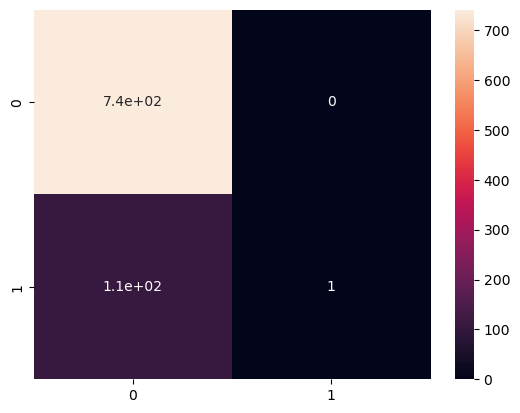

In [129]:
sns.heatmap(confusion_matrix, annot = True)
import matplotlib.pyplot as plt
plt.show()

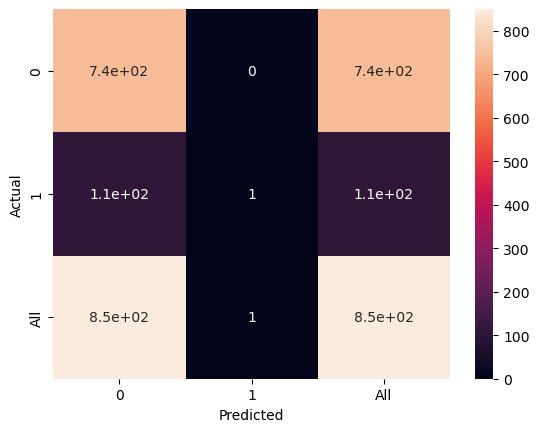

In [130]:
confusion_matrix_new = pd.crosstab(y_test, y_pred3, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix_new, annot = True)
plt.show()

In [131]:
Accuracy = metrics.accuracy_score(y_test, y_pred3)
print("Accuracy :",Accuracy)

Overall_Error_Rate = 1-Accuracy
print("Overall_Error_Rate :",Overall_Error_Rate)

Precision = metrics.precision_score(y_test, y_pred3)
print("Precision :",Precision)

Sensitivity_recall = metrics.recall_score(y_test, y_pred3)
print("Sensitivity Recall :",Sensitivity_recall)

Specificity = metrics.recall_score(y_test, y_pred3, pos_label = 0)
print("Specificity :",Specificity)

F1_score = metrics.f1_score(y_test, y_pred3)
print("F1 Score :",F1_score)

Accuracy : 0.8729411764705882
Overall_Error_Rate : 0.12705882352941178
Precision : 1.0
Sensitivity Recall : 0.009174311926605505
Specificity : 1.0
F1 Score : 0.018181818181818184


In [132]:
FPR = 1 - Specificity
FNR = 1 - Sensitivity_recall
print({"False Positive Rate":FPR,"False Negative Rate":FNR})

{'False Positive Rate': 0.0, 'False Negative Rate': 0.9908256880733946}


In [134]:
svc_decision_values = SVC.decision_function(X_test)
svc_roc_auc = roc_auc_score(y_test, svc_decision_values)
fpr, tpr, thresholds = roc_curve(y_test, svc_decision_values)

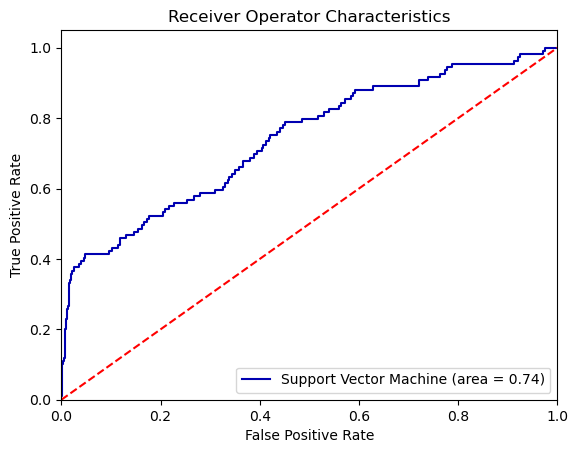

In [136]:
plt.figure()
plt.plot(fpr, tpr, label = 'Support Vector Machine (area = %0.2f)' %svc_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristics")
plt.legend(loc = "lower right")
# plt.savefig('Plot_Roc') # To save the plot in some object
plt.show()

Based on the all the metrics, the Random Forest Classifier appears to be the best model among the ones we have evaluated. It has the highest accuracy, precision, sensitivity, specificity, F1 score, and ROC Area. However, it's crucial to consider the specific requirements and constraints of our problem. 

For example:

If sensitivity (recall) is more critical (i.e., you want to catch as many positive cases as possible), then the Decision Tree might be a good choice.

If precision is essential (i.e., you want to minimize false positives), then the Random Forest Classifier is a strong candidate.

If a balance between precision and recall is needed, consider the KNN Classifier or Random Forest Classifier.


In [137]:
columns = X_train.columns
columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'total_day_minutes', 'total_day_calls',
       'total_eve_minutes', 'total_eve_calls', 'total_night_minutes',
       'total_night_calls', 'total_intl_minutes', 'total_intl_calls',
       'number_customer_service_calls'],
      dtype='object')

In [138]:
test1.head()

id  state  account_length  area_code  international_plan  voice_mail_plan  \
0   1     47             128          0                   0                1   
1   2      7             118          2                   1                0   
2   3     25              62          0                   0                0   
3   4     42              93          2                   0                0   
4   5     46             174          0                   0                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                      0              223.4               98   
2                      0              120.7               70   
3                      0              190.7              114   
4                      0              124.3               76   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             37.98              220.6              101             18.75   
2             20.52              307.2               76             26.11   
3             32.42              218.2              111             18.55   
4             21.13              277.1              112             23.55   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                203.9                118                9.18   
2                203.0                 99                9.14   
3                129.6                121                5.83   
4                250.7                115               11.28   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                 6.3                 6               1.70   
2                13.1                 6               3.54   
3                 8.1                 3               2.19   
4                15.5                 5               4.19   

   number_customer_service_calls  
0                              1  
1                              0  
2                              4  
3                              3  
4                              3

In [139]:
test3 = test1[columns]
test3.head()

state  account_length  area_code  international_plan  voice_mail_plan  \
0     47             128          0                   0                1   
1      7             118          2                   1                0   
2     25              62          0                   0                0   
3     42              93          2                   0                0   
4     46             174          0                   0                0   

   total_day_minutes  total_day_calls  total_eve_minutes  total_eve_calls  \
0              265.1              110              197.4               99   
1              223.4               98              220.6              101   
2              120.7               70              307.2               76   
3              190.7              114              218.2              111   
4              124.3               76              277.1              112   

   total_night_minutes  total_night_calls  total_intl_minutes  \
0                244.7                 91                10.0   
1                203.9                118                 6.3   
2                203.0                 99                13.1   
3                129.6                121                 8.1   
4                250.7                115                15.5   

   total_intl_calls  number_customer_service_calls  
0                 3                              1  
1                 6                              0  
2                 6                              4  
3                 3                              3  
4                 5                              3

Make predictions on test dataset by using Random FOrest Classifier Model

In [ ]:


pred_test= RFC.predict(test3)
submit_RFC_corr = pd.DataFrame({
    'id' :test1['id'],
    'num_orders' : pred_test
})
submit_RFC_corr.head()

In [145]:
submit_RFC_corr.to_csv('Customer_Churn_corrRFC.csv', index=False)

# Feature Selection Using SelectKBest and MutualClassifInfo

In [146]:
X_train.head()

state  account_length  area_code  international_plan  voice_mail_plan  \
712      18             166          1                   0                0   
1766      7              82          1                   0                0   
3306     45             142          2                   0                0   
2566     40              88          0                   0                0   
2323     38             145          1                   0                1   

      total_day_minutes  total_day_calls  total_eve_minutes  total_eve_calls  \
712               274.3              110               52.9              109   
1766              154.0              107               94.4              114   
3306              204.2               98              188.9               85   
2566               85.7              112              221.6               70   
2323              216.0               94              225.1              123   

      total_night_minutes  total_night_calls  total_intl_minutes  \
712                 246.1                119                10.9   
1766                287.6                 95                10.1   
3306                231.2                136                 6.5   
2566                190.6                 75                11.6   
2323                234.7                109                10.7   

      total_intl_calls  number_customer_service_calls  
712                  5                              0  
1766                 7                              1  
3306                 6                              1  
2566                 3                              4  
2323                 1                              2

In [147]:
import sklearn
from sklearn.feature_selection import mutual_info_classif

In [149]:
mutual_i= mutual_info_classif(X_train,y_train)

In [150]:
mutual_i

array([0.00995375, 0.        , 0.        , 0.01684953, 0.01044797,
       0.06230568, 0.        , 0.00111693, 0.005638  , 0.00580715,
       0.00168972, 0.00171519, 0.        , 0.03289955])

In [152]:
mutual_i=pd.Series(mutual_i)
mutual_i.index=X_train.columns
mutual_i

state                            0.009954
account_length                   0.000000
area_code                        0.000000
international_plan               0.016850
voice_mail_plan                  0.010448
total_day_minutes                0.062306
total_day_calls                  0.000000
total_eve_minutes                0.001117
total_eve_calls                  0.005638
total_night_minutes              0.005807
total_night_calls                0.001690
total_intl_minutes               0.001715
total_intl_calls                 0.000000
number_customer_service_calls    0.032900
dtype: float64

In [153]:
mutual_i.sort_values(ascending=False)

total_day_minutes                0.062306
number_customer_service_calls    0.032900
international_plan               0.016850
voice_mail_plan                  0.010448
state                            0.009954
total_night_minutes              0.005807
total_eve_calls                  0.005638
total_intl_minutes               0.001715
total_night_calls                0.001690
total_eve_minutes                0.001117
account_length                   0.000000
area_code                        0.000000
total_day_calls                  0.000000
total_intl_calls                 0.000000
dtype: float64

<Axes: >

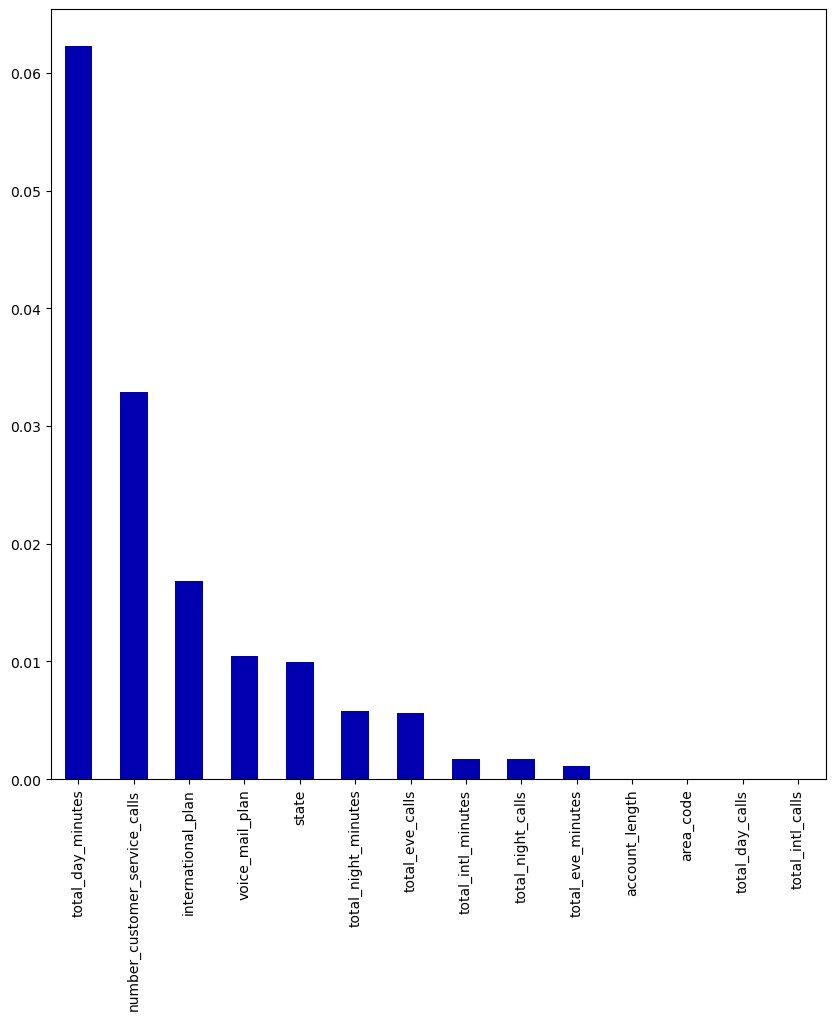

In [154]:
mutual_i.sort_values(ascending=False).plot(kind='bar',figsize=(10,10))

In [155]:
from sklearn.feature_selection import SelectKBest

In [156]:
top_8=SelectKBest(mutual_info_classif,k=8)

In [157]:
top_8.fit(X_train,y_train)

SelectKBest(k=8,
            score_func=<function mutual_info_classif at 0x0000016EA528FAC0>)

In [158]:
top_8.get_support()

array([ True, False,  True,  True,  True,  True, False, False, False,
        True, False,  True, False,  True])

In [160]:
# x_train.columns[top_8.get_support()]
sel_f=pd.DataFrame({'Feature':list(X_train.columns),
                   'Scores':top_8.scores_})
sel_f.sort_values(by = 'Scores', ascending=False)

Feature    Scores
5               total_day_minutes  0.064856
13  number_customer_service_calls  0.040930
3              international_plan  0.026625
11             total_intl_minutes  0.008055
4                 voice_mail_plan  0.007661
0                           state  0.007266
2                       area_code  0.003106
9             total_night_minutes  0.002829
1                  account_length  0.000000
6                 total_day_calls  0.000000
7               total_eve_minutes  0.000000
8                 total_eve_calls  0.000000
10              total_night_calls  0.000000
12               total_intl_calls  0.000000

In [162]:
X_train=X_train[X_train.columns[top_8.get_support()]]
X_train.head()

state  area_code  international_plan  voice_mail_plan  \
712      18          1                   0                0   
1766      7          1                   0                0   
3306     45          2                   0                0   
2566     40          0                   0                0   
2323     38          1                   0                1   

      total_day_minutes  total_night_minutes  total_intl_minutes  \
712               274.3                246.1                10.9   
1766              154.0                287.6                10.1   
3306              204.2                231.2                 6.5   
2566               85.7                190.6                11.6   
2323              216.0                234.7                10.7   

      number_customer_service_calls  
712                               0  
1766                              1  
3306                              1  
2566                              4  
2323                              2

In [163]:
X_test=X_test[X_test.columns[top_8.get_support()]]
X_test.head()

state  area_code  international_plan  voice_mail_plan  \
249      30          0                   0                0   
2419     11          0                   0                0   
1568     23          0                   0                0   
1483     31          1                   0                1   
705      48          0                   1                0   

      total_day_minutes  total_night_minutes  total_intl_minutes  \
249               266.6                207.2                 5.9   
2419              149.2                201.0                 8.1   
1568              222.3                249.4                12.1   
1483              166.9                171.0                11.5   
705               120.9                 95.1                11.4   

      number_customer_service_calls  
249                               1  
2419                              1  
1568                              1  
1483                              1  
705                               2

In [164]:
y_train.head()

712     0
1766    0
3306    0
2566    1
2323    0
Name: churn, dtype: int64

## Logistic Regression

In [165]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\sagar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [167]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [169]:
print('Accuracy of the log Regn Classifier on Test data is: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of the log Regn Classifier on Test data is: 0.86


In [171]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n",confusion_matrix)

Confusion Matrix 
 [[705  36]
 [ 84  25]]


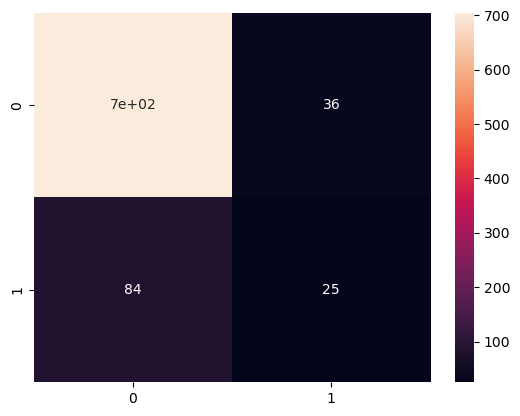

In [172]:
import seaborn as sn
sn.heatmap(confusion_matrix, annot = True)
import matplotlib.pyplot as plt
plt.show()

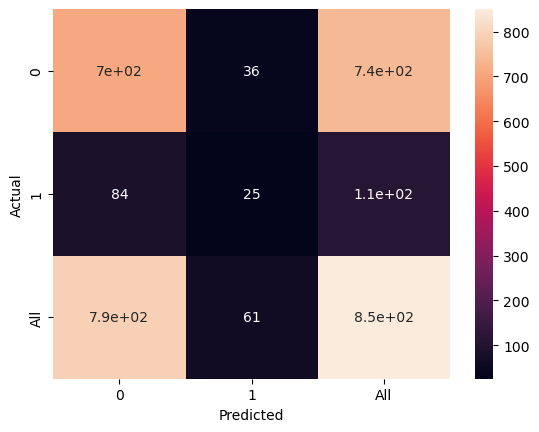

In [173]:
confusion_matrix_new = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix_new, annot = True)
plt.show()

In [174]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy :",Accuracy)

Overall_Error_Rate = 1-Accuracy
print("Overall_Error_Rate :",Overall_Error_Rate)

Precision = metrics.precision_score(y_test, y_pred)
print("Precision :",Precision)

Sensitivity_recall = metrics.recall_score(y_test, y_pred)
print("Sensitivity Recall :",Sensitivity_recall)

Specificity = metrics.recall_score(y_test, y_pred, pos_label = 0)
print("Specificity :",Specificity)

F1_score = metrics.f1_score(y_test, y_pred)
print("F1 Score :",F1_score)

Accuracy : 0.8588235294117647
Overall_Error_Rate : 0.14117647058823535
Precision : 0.4098360655737705
Sensitivity Recall : 0.22935779816513763
Specificity : 0.951417004048583
F1 Score : 0.2941176470588236


In [175]:
FPR = 1 - Specificity
FNR = 1 - Sensitivity_recall
print({"False Positive Rate":FPR,"False Negative Rate":FNR})

{'False Positive Rate': 0.04858299595141702, 'False Negative Rate': 0.7706422018348624}


In [177]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
# Defining method used for Roc and Auc
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# Print probability data frame from column 2 which has Index = 1

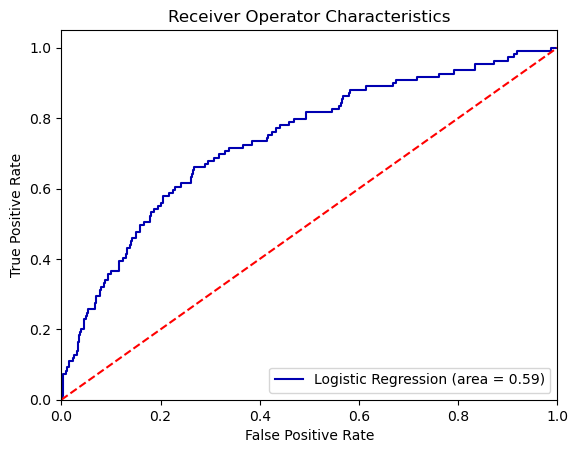

In [179]:
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristics")
plt.legend(loc = "lower right")
# plt.savefig('Plot_Roc') # To save the plot in some object
plt.show()

## Decision Tree

In [180]:
DTCL=tree.DecisionTreeClassifier() 
DTCL.fit(X_train,y_train)

DecisionTreeClassifier()

In [181]:
y_pred1=DTCL.predict(X_test)

In [183]:
import numpy as np
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix is \n', confusion_matrix)

Confusion Matrix is 
 [[687  54]
 [ 49  60]]


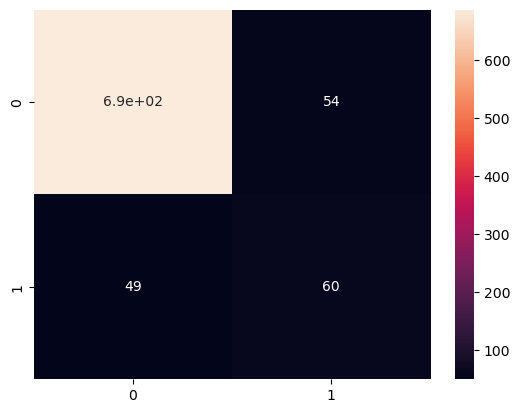

In [184]:
sns.heatmap(confusion_matrix, annot = True)
import matplotlib.pyplot as plt
plt.show()

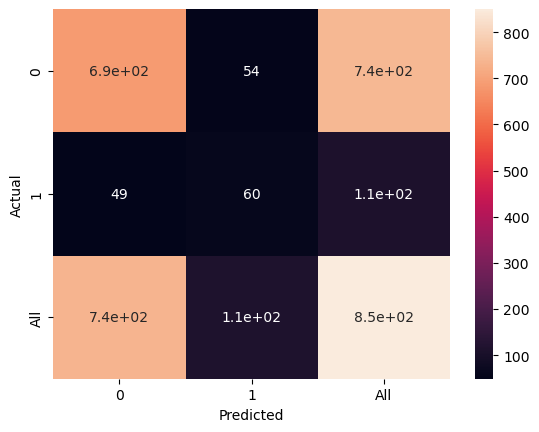

In [185]:
confusion_matrix_new = pd.crosstab(y_test, y_pred1, rownames=['Actual'], colnames=['Predicted'], margins = True)
sns.heatmap(confusion_matrix_new, annot = True)
plt.show()

In [186]:
Accuracy = metrics.accuracy_score(y_test, y_pred1)
print("Accuracy :",Accuracy)

Overall_Error_Rate = 1-Accuracy
print("Overall_Error_Rate :",Overall_Error_Rate)

Precision = metrics.precision_score(y_test, y_pred1)
print("Precision :",Precision)

Sensitivity_recall = metrics.recall_score(y_test, y_pred1)
print("Sensitivity Recall :",Sensitivity_recall)

Specificity = metrics.recall_score(y_test, y_pred1, pos_label = 0)
print("Specificity :",Specificity)

F1_score = metrics.f1_score(y_test, y_pred1)
print("F1 Score :",F1_score)

Accuracy : 0.8788235294117647
Overall_Error_Rate : 0.12117647058823533
Precision : 0.5263157894736842
Sensitivity Recall : 0.5504587155963303
Specificity : 0.9271255060728745
F1 Score : 0.538116591928251


In [187]:
FPR = 1 - Specificity
FNR = 1 - Sensitivity_recall
print({"False Positive Rate":FPR,"False Negative Rate":FNR})

{'False Positive Rate': 0.07287449392712553, 'False Negative Rate': 0.4495412844036697}


In [188]:
dtcl_roc_auc = roc_auc_score(y_test, DTCL.predict(X_test))
# Defining method used for Roc and Auc
fpr, tpr, thresholds = roc_curve(y_test, DTCL.predict_proba(X_test)[:,1])
# Print probability data frame from column 2 which has Index = 1

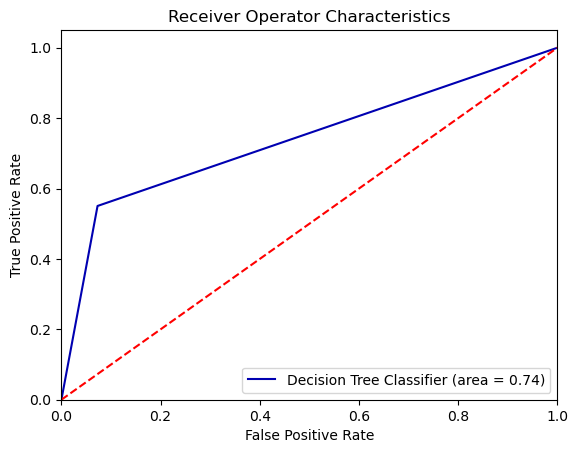

In [189]:
plt.figure()
plt.plot(fpr, tpr, label = 'Decision Tree Classifier (area = %0.2f)' %dtcl_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristics")
plt.legend(loc = "lower right")
## plt.savefig('Plot_Roc') # To save the plot in some object
plt.show()

## Random Forest Classifier

In [190]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [191]:
y_pred_RFC=RFC.predict(X_test)

In [192]:
print('Accuracy of the Random Forest Classifier Classifier on Test data is: {:.2f}'.format(RFC.score(X_test, y_test)))

Accuracy of the Random Forest Classifier Classifier on Test data is: 0.92


In [194]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_RFC)
print('Confusion Matrix is \n', confusion_matrix)

Confusion Matrix is 
 [[726  15]
 [ 55  54]]


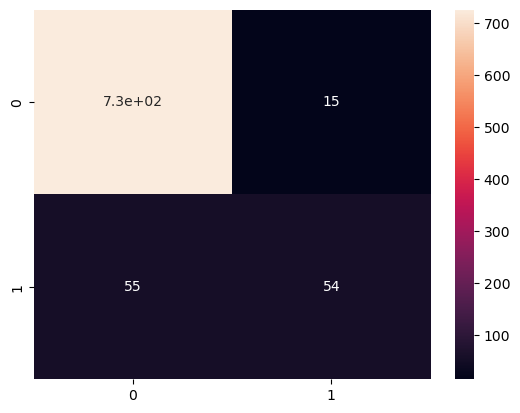

In [195]:
sns.heatmap(confusion_matrix, annot = True)
import matplotlib.pyplot as plt
plt.show()

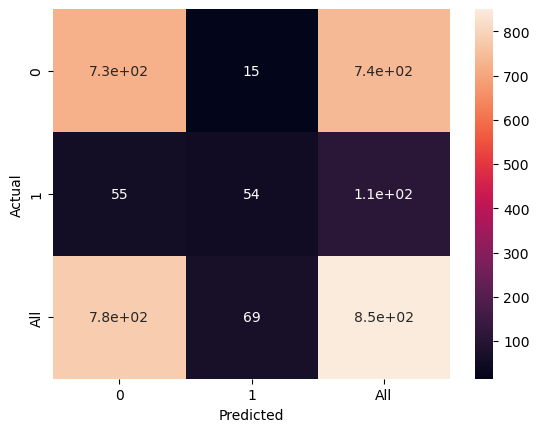

In [196]:
confusion_matrix_new = pd.crosstab(y_test, y_pred_RFC, rownames=['Actual'], colnames=['Predicted'], margins = True)
sns.heatmap(confusion_matrix_new, annot = True)
plt.show()

In [197]:
Accuracy = metrics.accuracy_score(y_test, y_pred_RFC)
print("Accuracy :",Accuracy)

Overall_Error_Rate = 1-Accuracy
print("Overall_Error_Rate :",Overall_Error_Rate)

Precision = metrics.precision_score(y_test, y_pred_RFC)
print("Precision :",Precision)

Sensitivity_recall = metrics.recall_score(y_test, y_pred_RFC)
print("Sensitivity Recall :",Sensitivity_recall)

Specificity = metrics.recall_score(y_test, y_pred_RFC, pos_label = 0)
print("Specificity :",Specificity)

F1_score = metrics.f1_score(y_test, y_pred_RFC)
print("F1 Score :",F1_score)

Accuracy : 0.9176470588235294
Overall_Error_Rate : 0.08235294117647063
Precision : 0.782608695652174
Sensitivity Recall : 0.4954128440366973
Specificity : 0.979757085020243
F1 Score : 0.6067415730337079


In [198]:
FPR = 1 - Specificity
FNR = 1 - Sensitivity_recall
print({"False Positive Rate":FPR,"False Negative Rate":FNR})

{'False Positive Rate': 0.020242914979757054, 'False Negative Rate': 0.5045871559633027}


In [199]:
rfc_roc_auc = roc_auc_score(y_test, RFC.predict(X_test))
# Defining method used for Roc and Auc
fpr, tpr, thresholds = roc_curve(y_test, RFC.predict_proba(X_test)[:,1])
# Print probability data frame from column 2 which has Index = 1

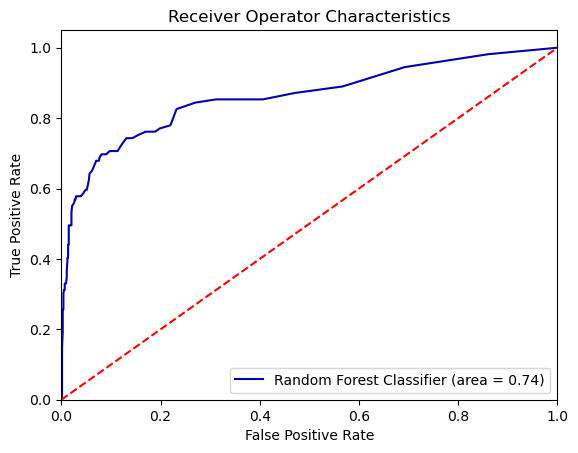

In [201]:
plt.figure()
plt.plot(fpr, tpr, label = 'Random Forest Classifier (area = %0.2f)' %rfc_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristics")
plt.legend(loc = "lower right")
## plt.savefig('Plot_Roc') # To save the plot in some object
plt.show()

## KNN Classifier

In [202]:
Knn=neighbors.KNeighborsClassifier()
Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [203]:
y_pred2=Knn.predict(X_test)

In [204]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred2)
print('Confusion Matrix is \n', confusion_matrix)

Confusion Matrix is 
 [[721  20]
 [ 83  26]]


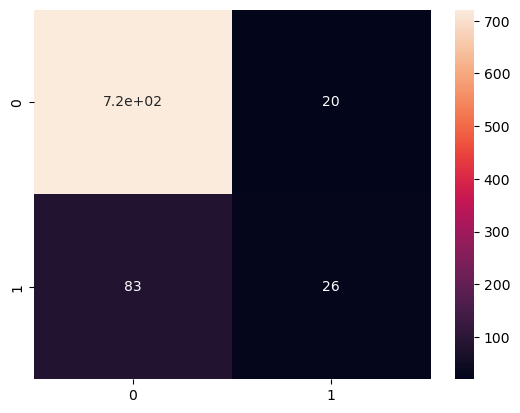

In [205]:
import seaborn as sn
sn.heatmap(confusion_matrix, annot = True)
import matplotlib.pyplot as plt
plt.show()

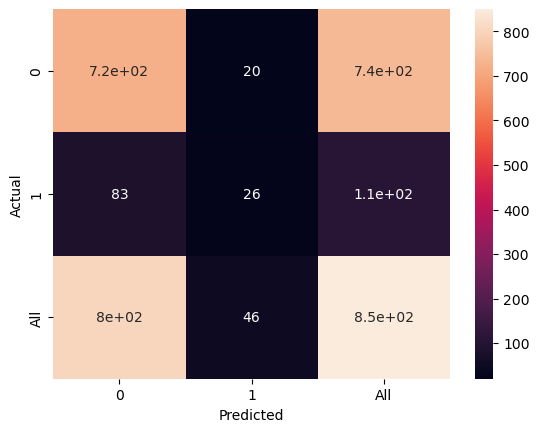

In [206]:
confusion_matrix_new = pd.crosstab(y_test, y_pred2, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix_new, annot = True)
plt.show()

In [207]:
Accuracy = metrics.accuracy_score(y_test, y_pred2)
print("Accuracy :",Accuracy)

Overall_Error_Rate = 1-Accuracy
print("Overall_Error_Rate :",Overall_Error_Rate)

Precision = metrics.precision_score(y_test, y_pred2)
print("Precision :",Precision)

Sensitivity_recall = metrics.recall_score(y_test, y_pred2)
print("Sensitivity Recall :",Sensitivity_recall)

Specificity = metrics.recall_score(y_test, y_pred2, pos_label = 0)
print("Specificity :",Specificity)

F1_score = metrics.f1_score(y_test, y_pred2)
print("F1 Score :",F1_score)

Accuracy : 0.8788235294117647
Overall_Error_Rate : 0.12117647058823533
Precision : 0.5652173913043478
Sensitivity Recall : 0.23853211009174313
Specificity : 0.9730094466936572
F1 Score : 0.3354838709677419


In [208]:
FPR = 1 - Specificity
FNR = 1 - Sensitivity_recall
print({"False Positive Rate":FPR,"False Negative Rate":FNR})

{'False Positive Rate': 0.026990553306342813, 'False Negative Rate': 0.7614678899082569}


In [209]:
knn_roc_auc = roc_auc_score(y_test, Knn.predict(X_test))
# Defining method used for Roc and Auc
fpr, tpr, thresholds = roc_curve(y_test, Knn.predict_proba(X_test)[:,1])
# Print probability data frame from column 2 which has Index = 1

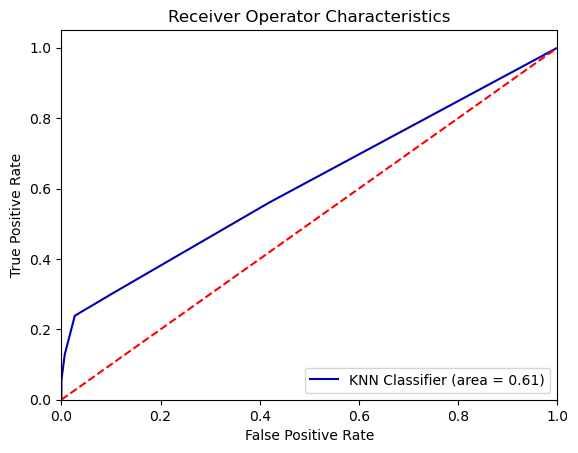

In [210]:
plt.figure()
plt.plot(fpr, tpr, label = 'KNN Classifier (area = %0.2f)' %knn_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristics")
plt.legend(loc = "lower right")
## plt.savefig('Plot_Roc') # To save the plot in some object
plt.show()

## Support Vector Classifier

In [212]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve

In [213]:
SVC = SVC()

In [214]:
SVC.fit(X_train,y_train)

SVC()

In [215]:
y_pred3=SVC.predict(X_test)

In [216]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred3)
print('Confusion Matrix is \n', confusion_matrix)

Confusion Matrix is 
 [[741   0]
 [108   1]]


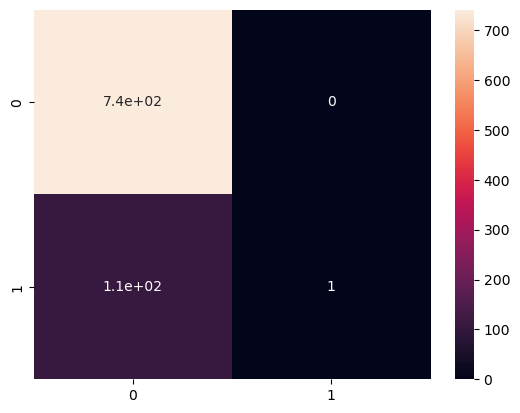

In [217]:
sns.heatmap(confusion_matrix, annot = True)
import matplotlib.pyplot as plt
plt.show()

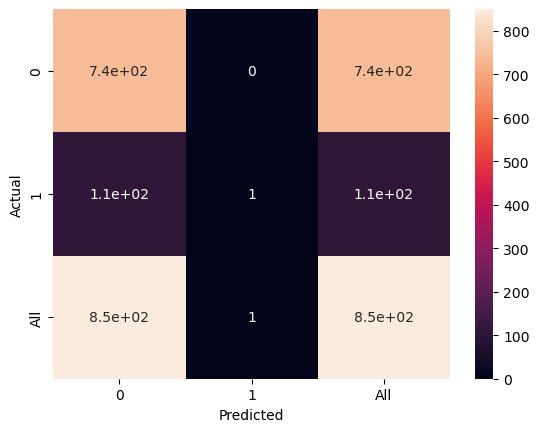

In [218]:
confusion_matrix_new = pd.crosstab(y_test, y_pred3, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix_new, annot = True)
plt.show()

In [219]:
Accuracy = metrics.accuracy_score(y_test, y_pred3)
print("Accuracy :",Accuracy)

Overall_Error_Rate = 1-Accuracy
print("Overall_Error_Rate :",Overall_Error_Rate)

Precision = metrics.precision_score(y_test, y_pred3)
print("Precision :",Precision)

Sensitivity_recall = metrics.recall_score(y_test, y_pred3)
print("Sensitivity Recall :",Sensitivity_recall)

Specificity = metrics.recall_score(y_test, y_pred3, pos_label = 0)
print("Specificity :",Specificity)

F1_score = metrics.f1_score(y_test, y_pred3)
print("F1 Score :",F1_score)

Accuracy : 0.8729411764705882
Overall_Error_Rate : 0.12705882352941178
Precision : 1.0
Sensitivity Recall : 0.009174311926605505
Specificity : 1.0
F1 Score : 0.018181818181818184


In [220]:
FPR = 1 - Specificity
FNR = 1 - Sensitivity_recall
print({"False Positive Rate":FPR,"False Negative Rate":FNR})

{'False Positive Rate': 0.0, 'False Negative Rate': 0.9908256880733946}


In [221]:
svc_decision_values = SVC.decision_function(X_test)
svc_roc_auc = roc_auc_score(y_test, svc_decision_values)
fpr, tpr, thresholds = roc_curve(y_test, svc_decision_values)

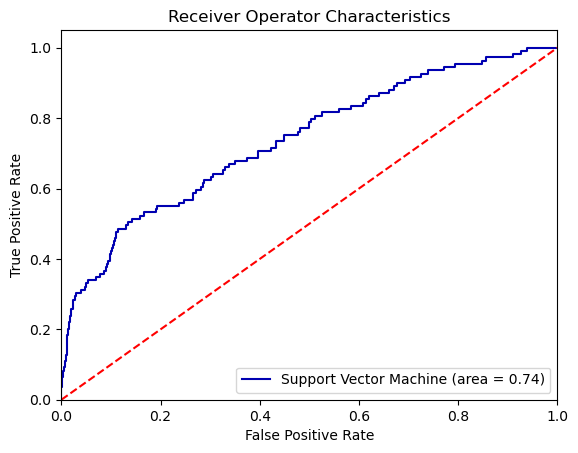

In [222]:
plt.figure()
plt.plot(fpr, tpr, label = 'Support Vector Classifer (area = %0.2f)' %svc_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristics")
plt.legend(loc = "lower right")
## plt.savefig('Plot_Roc') # To save the plot in some object
plt.show()

Based on these metrics, the Random Forest Classifier appears to be the best model among the ones we have evaluated. It has the highest accuracy, precision, sensitivity, and F1 score, which indicates a good balance between correctly identifying positive cases and minimizing false positives.

In [224]:
columns = X_train.columns
columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan',
       'total_day_minutes', 'total_night_minutes', 'total_intl_minutes',
       'number_customer_service_calls'],
      dtype='object')

In [225]:
test1.head()

id  state  account_length  area_code  international_plan  voice_mail_plan  \
0   1     47             128          0                   0                1   
1   2      7             118          2                   1                0   
2   3     25              62          0                   0                0   
3   4     42              93          2                   0                0   
4   5     46             174          0                   0                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                      0              223.4               98   
2                      0              120.7               70   
3                      0              190.7              114   
4                      0              124.3               76   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             37.98              220.6              101             18.75   
2             20.52              307.2               76             26.11   
3             32.42              218.2              111             18.55   
4             21.13              277.1              112             23.55   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                203.9                118                9.18   
2                203.0                 99                9.14   
3                129.6                121                5.83   
4                250.7                115               11.28   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                 6.3                 6               1.70   
2                13.1                 6               3.54   
3                 8.1                 3               2.19   
4                15.5                 5               4.19   

   number_customer_service_calls  
0                              1  
1                              0  
2                              4  
3                              3  
4                              3

In [226]:
test3 = test1[columns]
test3.head()

state  area_code  international_plan  voice_mail_plan  total_day_minutes  \
0     47          0                   0                1              265.1   
1      7          2                   1                0              223.4   
2     25          0                   0                0              120.7   
3     42          2                   0                0              190.7   
4     46          0                   0                0              124.3   

   total_night_minutes  total_intl_minutes  number_customer_service_calls  
0                244.7                10.0                              1  
1                203.9                 6.3                              0  
2                203.0                13.1                              4  
3                129.6                 8.1                              3  
4                250.7                15.5                              3

Make the predictions using Random Forest Classifier Model

In [227]:
pred_test= RFC.predict(test3)
submit_RFC_MIC = pd.DataFrame({
    'id' :test1['id'],
    'num_orders' : pred_test
})


submit_RFC_corr.to_csv('Customer_Churn_MIC_RFC.csv', index=False)

In [228]:
submit_RFC_MIC.head()

id  num_orders
0   1           0
1   2           0
2   3           1
3   4           0
4   5           0

## Conclusion

To determine which Random Forest Classifier model is better, we need to consider the specific context and requirements of your problem because the choice of the "best" model can depend on various factors. Here are some key points to consider:

Accuracy: The Random Forest Classifier using the 'corr' features has a higher accuracy (0.955) compared to the one using mutual information (0.918). Higher accuracy generally indicates better overall performance, but it might not be the sole criterion for selecting the best model.

Precision: The 'corr' features model has a higher precision (0.938) compared to the mutual information model (0.783). Precision is crucial if minimizing false positives is a top priority. In some applications, like medical diagnoses, precision is of utmost importance.

Sensitivity (Recall): The 'corr' features model has a higher sensitivity (0.697) compared to the mutual information model (0.495). Sensitivity is essential when correctly identifying positive cases (e.g., detecting diseases) is critical. A higher sensitivity means fewer false negatives.

Specificity: The 'corr' features model has a higher specificity (0.993) compared to the mutual information model (0.980). Specificity is essential when minimizing false positives is a priority, especially in applications where the cost of false positives is high.

F1 Score: The 'corr' features model has a higher F1 score (0.800) compared to the mutual information model (0.607). The F1 score is the harmonic mean of precision and recall and provides a balanced measure of a model's performance.

ROC Area: The 'corr' features model has a higher ROC Area (0.85) compared to the mutual information model (0.74). A higher ROC Area indicates a better ability to distinguish between positive and negative cases.

In summary, both models have their strengths and weaknesses:

If overall accuracy is the primary concern and false positives and false negatives are of roughly equal concern, the 'corr' features model might be preferred.

If minimizing false positives is more critical, the 'corr' features model with higher precision and specificity should be considered.

If correctly identifying positive cases (high sensitivity) is of utmost importance, and you can tolerate some false positives, the 'corr' features model might still be the better choice.

Consider the specific use case and the consequences of false positives and false negatives when deciding which model to use. Also, consider whether further optimization or tuning of hyperparameters could improve the performance of either model.